In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import sys
import random, pickle
from os.path import join as oj
from tqdm import tqdm
sys.path.insert(1, oj(sys.path[0], 'mnist'))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy
cs_div = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
sns.set_style(style='white')
sns.set_palette("husl")

import torch
import foolbox
import mnist.mnist as dset
from mnist.mnist import pred_ims
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from conv2dnp import conv2dnp
import visualize as viz
import tiling
import agglomerate
from cd import cd
import scores
import attack_helper

import warnings
warnings.filterwarnings("ignore")

# load the model
model = dset.Net().cuda()
model.load_state_dict(torch.load('mnist/mnist.model'))
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [385]:
print(dset.get_im_and_label(im_num))
im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(im_num, attack_type)

TypeError: 'NoneType' object is not iterable

# attack

In [430]:
# pick im + attack
np.random.seed(1234)
im_nums = np.random.permutation(10000)[:100] #range(20)
ats = ['fgsm', 'saliency', 'gradientattack', 'deepfoolattack', 'boundaryattack'] #['saliency'] 
methods = ['break_down'] #['cd', 'break_down', 'build_up']
err_cnt = {}
for method in methods:
    err_cnt[method] = {}
    for attack_type in ats:
        err_cnt[method][attack_type] = 0
        print(method, attack_type)
        total_lists = []
        for im_num in tqdm(im_nums):
            try:
                # generate attack
                im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(im_num, attack_type)
                # aggregate
                all_lists = attack_helper.agglomerate_lists(im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, method=method)
                total_lists.append((all_lists, label, target, pred_orig, pred_adv, im_torch_adv, im_torch))
            except:
                err_cnt[method][attack_type] += 1
        pickle.dump(total_lists, open('adv_results/total_lists_' + attack_type + '_' + method + '.pkl', 'wb'))


  0%|          | 0/100 [00:00<?, ?it/s]

break_down fgsm




 56%|█████▌    | 56/100 [25:28<19:37, 26.76s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 90%|█████████ | 90/100 [39:35<04:34, 27.50s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
  0%|          | 0/100 [00:00<?, ?it/s]

break_down saliency


 56%|█████▌    | 56/100 [22:33<17:44, 24.19s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 90%|█████████ | 90/100 [35:07<04:13, 25.35s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
  0%|          | 0/100 [00:00<?, ?it/s]

break_down gradientattack


 56%|█████▌    | 56/100 [23:36<18:34, 25.32s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 90%|█████████ | 90/100 [36:44<04:15, 25.56s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
  0%|          | 0/100 [00:00<?, ?it/s]

break_down deepfoolattack


 56%|█████▌    | 56/100 [23:09<17:42, 24.15s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 90%|█████████ | 90/100 [36:06<04:19, 25.92s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
  0%|          | 0/100 [00:00<?, ?it/s]

break_down boundaryattack
run with verbose=True to see details
Step 0: 6.03609e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3600: 9.20511e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3714: 9.20508e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3715: 9.20508e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3716: 9.20508e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3717: 9.20508e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3718: 9.20508e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3719: 9.20508e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3720: 9.20508e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3721: 9.20508e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3722: 9.20508e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3723: 9.20508e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3724: 9.20508e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3725: 9.20508e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3726: 9.20508e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3727: 9.20508e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3728: 9.20508e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3729: 9.20508e-04

  1%|          | 1/100 [01:02<1:42:28, 62.11s/it]

run with verbose=True to see details
Step 0: 6.53878e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4220: 1.81755e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4331: 1.81755e-03, stepsizes = 1.3e-06/7.8e-08: 
Step 4332: 1.81755e-03, stepsizes = 1.3e-06/7.8e-08: 
Step 4333: 1.81755e-03, stepsizes = 1.3e-06/7.8e-08: 
Step 4334: 1.81755e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4335: 1.81755e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4336: 1.81755e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4337: 1.81755e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4338: 1.81755e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4339: 1.81755e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4340: 1.81755e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4341: 1.81755e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4342: 1.81755e-03, stepsizes = 5.9e-07/2.3e-08: 
Step 4343: 1.81755e-03, stepsizes = 5.9e-07/2.3e-08: 
Step 4344: 1.81755e-03, stepsizes = 5.9e-07/1.5e-08: 
Step 4345: 1.81755e-03, stepsizes = 5.9e-07/1.5e-08: 
Step 4346: 1.81755e-03, stepsizes = 4.0e-07/1.0e

  2%|▏         | 2/100 [02:08<1:43:27, 63.34s/it]

run with verbose=True to see details
Step 0: 6.90377e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4320: 2.11706e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4432: 2.11706e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4433: 2.11706e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4434: 2.11706e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4435: 2.11705e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4436: 2.11705e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4437: 2.11705e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4438: 2.11705e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4439: 2.11705e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4440: 2.11705e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4441: 2.11705e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4442: 2.11705e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4443: 2.11705e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4444: 2.11705e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4445: 2.11705e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4446: 2.11705e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4447: 2.11705e-03, stepsizes = 3.4e-05/1.2e

  3%|▎         | 3/100 [03:22<1:47:52, 66.73s/it]

run with verbose=True to see details
Step 0: 1.64855e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3400: 6.55879e-05, stepsizes = 5.1e-05/7.8e-08: 
Step 3508: 6.55879e-05, stepsizes = 1.8e-07/7.8e-08: 
Step 3509: 6.55879e-05, stepsizes = 1.8e-07/7.8e-08: 
Step 3510: 6.55879e-05, stepsizes = 1.8e-07/7.8e-08: 
Step 3511: 6.55879e-05, stepsizes = 1.8e-07/7.8e-08: 
Step 3512: 6.55879e-05, stepsizes = 1.2e-07/3.5e-08: 
Step 3513: 6.55879e-05, stepsizes = 1.2e-07/3.5e-08: 
Step 3514: 6.55879e-05, stepsizes = 1.2e-07/3.5e-08: 
Step 3515: 6.55879e-05, stepsizes = 1.2e-07/3.5e-08: 
Step 3516: 6.55879e-05, stepsizes = 7.8e-08/2.3e-08: 
Step 3517: 6.55879e-05, stepsizes = 7.8e-08/2.3e-08: 
Step 3518: 6.55879e-05, stepsizes = 7.8e-08/2.3e-08: 
Step 3519: 6.55879e-05, stepsizes = 7.8e-08/2.3e-08: 
Step 3520: 6.55879e-05, stepsizes = 5.2e-08/1.5e-08: 
Step 3521: 6.55879e-05, stepsizes = 5.2e-08/1.5e-08: 
Step 3522: 6.55879e-05, stepsizes = 5.2e-08/1.0e-08: 
Step 3523: 6.55879e-05, stepsizes = 5.2e-08/1.0e

  4%|▍         | 4/100 [04:23<1:43:38, 64.78s/it]

run with verbose=True to see details
Step 0: 9.22435e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3460: 1.90702e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3561: 1.90702e-04, stepsizes = 4.5e-06/7.8e-08: 
Step 3562: 1.90702e-04, stepsizes = 4.5e-06/7.8e-08: 
Step 3563: 1.90702e-04, stepsizes = 4.5e-06/7.8e-08: 
Step 3564: 1.90702e-04, stepsizes = 4.5e-06/7.8e-08: 
Step 3565: 1.90702e-04, stepsizes = 3.0e-06/5.2e-08: 
Step 3566: 1.90702e-04, stepsizes = 3.0e-06/5.2e-08: 
Step 3567: 1.90702e-04, stepsizes = 3.0e-06/3.5e-08: 
Step 3568: 1.90702e-04, stepsizes = 3.0e-06/3.5e-08: 
Step 3569: 1.90702e-04, stepsizes = 3.0e-06/3.5e-08: 
Step 3570: 1.90702e-04, stepsizes = 3.0e-06/3.5e-08: 
Step 3571: 1.90702e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3572: 1.90702e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3573: 1.90702e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3574: 1.90702e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3575: 1.90702e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3576: 1.90702e-04, stepsizes = 3.0e-06/1.5e

  5%|▌         | 5/100 [05:29<1:43:18, 65.24s/it]

run with verbose=True to see details
Step 0: 9.38448e-02, stepsizes = 1.0e-02/1.0e-02: 


  6%|▌         | 6/100 [06:46<1:47:36, 68.69s/it]

run with verbose=True to see details
Step 0: 7.83339e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3620: 7.09185e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3735: 7.09184e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3736: 7.09184e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3737: 7.09184e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3738: 7.09184e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3739: 7.09184e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 3740: 7.09184e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 3741: 7.09184e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 3742: 7.09184e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 3743: 7.09184e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 3744: 7.09184e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 3745: 7.09184e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 3746: 7.09184e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 3747: 7.09184e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 3748: 7.09184e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 3749: 7.09184e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 3750: 7.09184e-04, stepsizes = 6.8e-06/2.3e

  7%|▋         | 7/100 [07:58<1:47:54, 69.62s/it]

run with verbose=True to see details
Step 0: 1.33605e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3690: 6.87096e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3792: 6.87096e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3793: 6.87096e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3794: 6.87096e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 3795: 6.87096e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 3796: 6.87096e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 3797: 6.87096e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 3798: 6.87096e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 3799: 6.87096e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 3800: 6.87096e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 3801: 6.87096e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 3802: 6.87096e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3803: 6.87096e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3804: 6.87096e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3805: 6.87096e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3806: 6.87096e-04, stepsizes = 2.6e-07/1.5e-08: 
Step 3807: 6.87096e-04, stepsizes = 2.6e-07/1.5e

  8%|▊         | 8/100 [09:09<1:47:48, 70.31s/it]

run with verbose=True to see details
Step 0: 6.12729e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3570: 1.01837e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3676: 1.01837e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 3677: 1.01837e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 3678: 1.01837e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 3679: 1.01837e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 3680: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3681: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3682: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3683: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3684: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3685: 1.01837e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3686: 1.01837e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 3687: 1.01837e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 3688: 1.01837e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 3689: 1.01837e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 3690: 1.01837e-03, stepsizes = 8.9e-07/1.0e-08: 
Step 3691: 1.01837e-03, stepsizes = 8.9e-07/1.0e

  9%|▉         | 9/100 [10:15<1:44:26, 68.86s/it]

run with verbose=True to see details
Step 0: 7.84709e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3680: 7.52557e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3788: 7.52557e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3789: 7.52557e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3790: 7.52557e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3791: 7.52557e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3792: 7.52557e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3793: 7.52557e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3794: 7.52557e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3795: 7.52557e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3796: 7.52557e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3797: 7.52557e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3798: 7.52557e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3799: 7.52557e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3800: 7.52557e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3801: 7.52557e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3802: 7.52557e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3803: 7.52557e-04, stepsizes = 5.2e-08/1.5e

 10%|█         | 10/100 [11:15<1:39:15, 66.17s/it]

run with verbose=True to see details
Step 0: 7.47622e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4000: 8.15160e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 4103: 8.15160e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4104: 8.15160e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4105: 8.15160e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4106: 8.15160e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4107: 8.15160e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4108: 8.15160e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4109: 8.15160e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4110: 8.15160e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4111: 8.15160e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4112: 8.15160e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4113: 8.15160e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4114: 8.15160e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4115: 8.15160e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4116: 8.15160e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4117: 8.15160e-04, stepsizes = 8.9e-07/2.3e-08: 
Step 4118: 8.15160e-04, stepsizes = 8.9e-07/2.3e

 11%|█         | 11/100 [12:23<1:38:54, 66.68s/it]

run with verbose=True to see details
Step 0: 9.73220e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4570: 2.49832e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4681: 2.49832e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4682: 2.49832e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4683: 2.49832e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4684: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4685: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4686: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4687: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4688: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4689: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4690: 2.49832e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4691: 2.49832e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4692: 2.49832e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4693: 2.49832e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4694: 2.49832e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4695: 2.49832e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4696: 2.49832e-03, stepsizes = 3.4e-05/5.2e

 12%|█▏        | 12/100 [13:38<1:41:23, 69.14s/it]

run with verbose=True to see details
Step 0: 6.32536e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3370: 4.61356e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3462: 4.61356e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3463: 4.61356e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3464: 4.61356e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3465: 4.61356e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3466: 4.61356e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3467: 4.61356e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3468: 4.61356e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3469: 4.61356e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3470: 4.61356e-04, stepsizes = 4.0e-07/3.5e-08: 
Step 3471: 4.61356e-04, stepsizes = 4.0e-07/3.5e-08: 
Step 3472: 4.61356e-04, stepsizes = 4.0e-07/3.5e-08: 
Step 3473: 4.61356e-04, stepsizes = 4.0e-07/3.5e-08: 
Step 3474: 4.61356e-04, stepsizes = 2.6e-07/2.3e-08: 
Step 3475: 4.61356e-04, stepsizes = 2.6e-07/2.3e-08: 
Step 3476: 4.61356e-04, stepsizes = 2.6e-07/2.3e-08: 
Step 3477: 4.61356e-04, stepsizes = 2.6e-07/2.3e

 13%|█▎        | 13/100 [14:34<1:34:50, 65.40s/it]

run with verbose=True to see details
Step 0: 8.70334e-02, stepsizes = 1.0e-02/1.0e-02: 


 14%|█▍        | 14/100 [15:47<1:37:03, 67.71s/it]

run with verbose=True to see details
Step 0: 9.07864e-02, stepsizes = 1.0e-02/1.0e-02: 


 15%|█▌        | 15/100 [17:08<1:41:32, 71.68s/it]

run with verbose=True to see details
Step 0: 6.19435e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3890: 5.17837e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 4001: 5.17836e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4002: 5.17836e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4003: 5.17836e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4004: 5.17836e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4005: 5.17836e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4006: 5.17836e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4007: 5.17836e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4008: 5.17836e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4009: 5.17836e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4010: 5.17836e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4011: 5.17836e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 4012: 5.17836e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 4013: 5.17836e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4014: 5.17836e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4015: 5.17836e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4016: 5.17836e-04, stepsizes = 4.5e-06/1.5e

 16%|█▌        | 16/100 [18:16<1:38:28, 70.34s/it]

run with verbose=True to see details
Step 0: 9.79260e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3700: 2.18500e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3811: 2.18500e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3812: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3813: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3814: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3815: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3816: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3817: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3818: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3819: 2.18500e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3820: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3821: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3822: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3823: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3824: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3825: 2.18499e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3826: 2.18499e-03, stepsizes = 2.3e-05/5.2e

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4310: 2.18466e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4421: 2.18465e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4422: 2.18465e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4423: 2.18465e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4424: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4425: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4426: 2.18465e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4427: 2.18465e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4428: 2.18465e-03, stepsizes = 5.1e-05/5.2e-08: 
Step 4429: 2.18465e-03, stepsizes = 5.1e-05/5.2e-08: 
Step 4430: 2.18465e-03, stepsizes = 5.1e-05/5.2e-08: 
Step 4431: 2.18465e-03, stepsizes = 3.4e-05/3.5e-08: 
Step 4432: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4433: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4434: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4435: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4436: 2.18465e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4437: 2.18465e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4438: 2.18465e-03, step

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4630: 2.18460e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4750: 2.18460e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4751: 2.18460e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4752: 2.18460e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4753: 2.18460e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4754: 2.18460e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4755: 2.18460e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4756: 2.18460e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4757: 2.18460e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4758: 2.18460e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4759: 2.18460e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4760: 2.18460e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4761: 2.18460e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4762: 2.18460e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4763: 2.18460e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4764: 2.18460e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4765: 2.18460e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4766: 2.18460e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4767: 2.18460e-03, step

 17%|█▋        | 17/100 [19:35<1:41:04, 73.06s/it]

run with verbose=True to see details
Step 0: 5.15987e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4030: 1.27254e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4139: 1.27254e-03, stepsizes = 6.8e-06/7.8e-08: 
Step 4140: 1.27254e-03, stepsizes = 6.8e-06/7.8e-08: 
Step 4141: 1.27254e-03, stepsizes = 6.8e-06/7.8e-08: 
Step 4142: 1.27254e-03, stepsizes = 6.8e-06/7.8e-08: 
Step 4143: 1.27254e-03, stepsizes = 6.8e-06/7.8e-08: 
Step 4144: 1.27254e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 4145: 1.27254e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4146: 1.27254e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4147: 1.27254e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4148: 1.27254e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4149: 1.27254e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4150: 1.27254e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4151: 1.27254e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4152: 1.27254e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4153: 1.27254e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4154: 1.27254e-03, stepsizes = 4.5e-06/2.3e

 20%|██        | 20/100 [22:56<1:31:45, 68.82s/it]

run with verbose=True to see details
Step 0: 7.81493e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3350: 2.89300e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3462: 2.89300e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3463: 2.89300e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3464: 2.89300e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3465: 2.89300e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 3466: 2.89300e-04, stepsizes = 7.8e-08/3.5e-08: 
Step 3467: 2.89300e-04, stepsizes = 7.8e-08/3.5e-08: 
Step 3468: 2.89300e-04, stepsizes = 7.8e-08/3.5e-08: 
Step 3469: 2.89300e-04, stepsizes = 7.8e-08/3.5e-08: 
Step 3470: 2.89300e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3471: 2.89300e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3472: 2.89300e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3473: 2.89300e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3474: 2.89300e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3475: 2.89300e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3476: 2.89300e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3477: 2.89300e-04, stepsizes = 3.5e-08/1.5e

 21%|██        | 21/100 [23:52<1:25:46, 65.14s/it]

run with verbose=True to see details
Step 0: 4.17350e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3730: 8.11038e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3843: 8.11038e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3844: 8.11038e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3845: 8.11038e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3846: 8.11038e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3847: 8.11038e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3848: 8.11038e-04, stepsizes = 4.0e-07/3.5e-08: 
Step 3849: 8.11038e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3850: 8.11038e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3851: 8.11038e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3852: 8.11038e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3853: 8.11038e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3854: 8.11038e-04, stepsizes = 4.0e-07/1.5e-08: 
Step 3855: 8.11038e-04, stepsizes = 4.0e-07/1.5e-08: 
Step 3856: 8.11038e-04, stepsizes = 4.0e-07/1.5e-08: 
Step 3857: 8.11038e-04, stepsizes = 4.0e-07/1.5e-08: 
Step 3858: 8.11038e-04, stepsizes = 4.0e-07/1.5e

 22%|██▏       | 22/100 [24:58<1:24:45, 65.20s/it]

run with verbose=True to see details
Step 0: 7.31608e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4560: 7.09534e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 4664: 7.09534e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4665: 7.09534e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4666: 7.09534e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4667: 7.09534e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4668: 7.09534e-04, stepsizes = 1.8e-07/5.2e-08: 
Step 4669: 7.09534e-04, stepsizes = 1.8e-07/5.2e-08: 
Step 4670: 7.09534e-04, stepsizes = 1.8e-07/5.2e-08: 
Step 4671: 7.09534e-04, stepsizes = 1.8e-07/5.2e-08: 
Step 4672: 7.09534e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 4673: 7.09534e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4674: 7.09534e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4675: 7.09534e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4676: 7.09534e-04, stepsizes = 7.8e-08/1.5e-08: 
Step 4677: 7.09534e-04, stepsizes = 7.8e-08/1.5e-08: 
Step 4678: 7.09534e-04, stepsizes = 7.8e-08/1.5e-08: 
Step 4679: 7.09534e-04, stepsizes = 7.8e-08/1.5e

 23%|██▎       | 23/100 [26:07<1:25:06, 66.32s/it]

run with verbose=True to see details
Step 0: 5.31078e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4130: 7.32147e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 4234: 7.32147e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4235: 7.32147e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4236: 7.32147e-04, stepsizes = 2.6e-07/7.8e-08: 
Step 4237: 7.32147e-04, stepsizes = 2.6e-07/5.2e-08: 
Step 4238: 7.32147e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 4239: 7.32147e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 4240: 7.32147e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 4241: 7.32147e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 4242: 7.32147e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4243: 7.32147e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4244: 7.32147e-04, stepsizes = 1.2e-07/2.3e-08: 
Step 4245: 7.32147e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 4246: 7.32147e-04, stepsizes = 7.8e-08/1.0e-08: 
Step 4247: 7.32147e-04, stepsizes = 7.8e-08/1.0e-08: 
Step 4248: 7.32147e-04, stepsizes = 7.8e-08/1.0e-08: 
Step 4249: 7.32147e-04, stepsizes = 7.8e-08/1.0e

 24%|██▍       | 24/100 [27:11<1:23:24, 65.86s/it]

run with verbose=True to see details
Step 0: 6.51114e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4400: 1.39259e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4509: 1.39259e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4510: 1.39259e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4511: 1.39259e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4512: 1.39259e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4513: 1.39259e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4514: 1.39259e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4515: 1.39259e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4516: 1.39259e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4517: 1.39259e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4518: 1.39259e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4519: 1.39259e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4520: 1.39259e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4521: 1.39259e-03, stepsizes = 6.8e-06/1.5e-08: 
Step 4522: 1.39259e-03, stepsizes = 6.8e-06/1.5e-08: 
Step 4523: 1.39259e-03, stepsizes = 6.8e-06/1.5e-08: 
Step 4524: 1.39259e-03, stepsizes = 6.8e-06/1.5e

 25%|██▌       | 25/100 [28:31<1:27:34, 70.06s/it]

run with verbose=True to see details
Step 0: 1.09092e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3570: 9.90880e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3682: 9.90880e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3683: 9.90880e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3684: 9.90880e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3685: 9.90880e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3686: 9.90880e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3687: 9.90880e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3688: 9.90880e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3689: 9.90880e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3690: 9.90880e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3691: 9.90880e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3692: 9.90880e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3693: 9.90880e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3694: 9.90880e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 3695: 9.90880e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3696: 9.90880e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3697: 9.90880e-04, stepsizes = 3.5e-08/1.5e

 26%|██▌       | 26/100 [29:41<1:26:15, 69.94s/it]

run with verbose=True to see details
Step 0: 2.61423e-06, stepsizes = 1.0e-02/1.0e-02: 


/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolb

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolb

Step 2010: 2.60266e-09, stepsizes = 6.8e-06/7.8e-08: 


/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:569: UserWarning: Internal inconsistency, probably caused by numerical errors
  warnings.warn('Internal inconsistency, probably caused by '


Step 2113: 2.60266e-09, stepsizes = 4.0e-07/7.8e-08: 
Step 2114: 2.60266e-09, stepsizes = 4.0e-07/7.8e-08: 
Step 2115: 2.60266e-09, stepsizes = 4.0e-07/7.8e-08: 
Step 2116: 2.60266e-09, stepsizes = 4.0e-07/7.8e-08: 
Step 2117: 2.60266e-09, stepsizes = 4.0e-07/5.2e-08: 
Step 2118: 2.60266e-09, stepsizes = 4.0e-07/5.2e-08: 
Step 2119: 2.60266e-09, stepsizes = 4.0e-07/5.2e-08: 
Step 2120: 2.60266e-09, stepsizes = 4.0e-07/5.2e-08: 
Step 2121: 2.60266e-09, stepsizes = 4.0e-07/5.2e-08: 
Step 2122: 2.60266e-09, stepsizes = 4.0e-07/3.5e-08: 
Step 2123: 2.60266e-09, stepsizes = 4.0e-07/3.5e-08: 
Step 2124: 2.60266e-09, stepsizes = 4.0e-07/3.5e-08: 
Step 2125: 2.60266e-09, stepsizes = 4.0e-07/3.5e-08: 
Step 2126: 2.60266e-09, stepsizes = 4.0e-07/2.3e-08: 
Step 2127: 2.60266e-09, stepsizes = 4.0e-07/2.3e-08: 
Step 2128: 2.60266e-09, stepsizes = 4.0e-07/2.3e-08: 
Step 2129: 2.60266e-09, stepsizes = 4.0e-07/2.3e-08: 
Step 2130: 2.60266e-09, stepsizes = 4.0e-07/1.5e-08: 
Step 2131: 2.60266e-09, step

 27%|██▋       | 27/100 [30:29<1:17:02, 63.33s/it]

run with verbose=True to see details
Step 0: 8.59878e-02, stepsizes = 1.0e-02/1.0e-02: 


 28%|██▊       | 28/100 [31:39<1:18:26, 65.37s/it]

run with verbose=True to see details
Step 0: 6.44200e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3270: 4.62326e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3382: 4.62326e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3383: 4.62326e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3384: 4.62326e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3385: 4.62326e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3386: 4.62326e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3387: 4.62326e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3388: 4.62326e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3389: 4.62326e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3390: 4.62326e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3391: 4.62326e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3392: 4.62326e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3393: 4.62326e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3394: 4.62326e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 3395: 4.62326e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 3396: 4.62326e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 3397: 4.62326e-04, stepsizes = 3.5e-08/2.3e

 29%|██▉       | 29/100 [32:49<1:19:04, 66.83s/it]

run with verbose=True to see details
Step 0: 6.34183e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4270: 1.07319e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4370: 1.07319e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4371: 1.07319e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4372: 1.07319e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4373: 1.07319e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4374: 1.07319e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4375: 1.07319e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4376: 1.07319e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4377: 1.07319e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4378: 1.07319e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4379: 1.07319e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4380: 1.07319e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4381: 1.07319e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4382: 1.07319e-03, stepsizes = 1.2e-07/1.5e-08: 
Step 4383: 1.07319e-03, stepsizes = 1.2e-07/1.5e-08: 
Step 4384: 1.07319e-03, stepsizes = 1.2e-07/1.5e-08: 
Step 4385: 1.07319e-03, stepsizes = 1.2e-07/1.5e

 30%|███       | 30/100 [33:58<1:18:50, 67.59s/it]

run with verbose=True to see details
Step 0: 9.67264e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3810: 1.26183e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3918: 1.26183e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 3919: 1.26183e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 3920: 1.26183e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 3921: 1.26183e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 3922: 1.26183e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 3923: 1.26183e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 3924: 1.26183e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 3925: 1.26183e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 3926: 1.26183e-03, stepsizes = 7.8e-08/3.5e-08: 
Step 3927: 1.26183e-03, stepsizes = 7.8e-08/3.5e-08: 
Step 3928: 1.26183e-03, stepsizes = 7.8e-08/3.5e-08: 
Step 3929: 1.26183e-03, stepsizes = 7.8e-08/3.5e-08: 
Step 3930: 1.26183e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3931: 1.26183e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3932: 1.26183e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3933: 1.26183e-03, stepsizes = 5.2e-08/2.3e

 31%|███       | 31/100 [35:06<1:17:38, 67.52s/it]

run with verbose=True to see details
Step 0: 6.99144e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3460: 1.49585e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3571: 1.49585e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3572: 1.49585e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3573: 1.49585e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3574: 1.49585e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3575: 1.49585e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3576: 1.49585e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3577: 1.49585e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3578: 1.49585e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3579: 1.49585e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3580: 1.49585e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3581: 1.49585e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3582: 1.49585e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3583: 1.49585e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3584: 1.49585e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3585: 1.49585e-03, stepsizes = 2.3e-08/1.5e-08: 
Step 3586: 1.49585e-03, stepsizes = 2.3e-08/1.5e

 32%|███▏      | 32/100 [36:05<1:13:39, 65.00s/it]

run with verbose=True to see details
Step 0: 8.46818e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3190: 2.91076e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3405: 2.91062e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3406: 2.91062e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3407: 2.91062e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3408: 2.91062e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3409: 2.91062e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3410: 2.91062e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3411: 2.91062e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3412: 2.91062e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3413: 2.91062e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 3414: 2.91062e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 3415: 2.91062e-03, stepsizes = 1.0e-05/1.5e-08: 
Step 3416: 2.91062e-03, stepsizes = 1.0e-05/1.5e-08: 
Step 3417: 2.91062e-03, stepsizes = 1.0e-05/1.5e-08: 
Step 3418: 2.91062e-03, stepsizes = 1.0e-05/1.5e-08: 
Step 3419: 2.91062e-03, stepsizes = 1.0e-05/1.5e-08: 
Step 3420: 2.91062e-03, stepsizes = 1.0e-05/1.5e

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 3640: 2.91050e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3746: 2.91050e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3747: 2.91050e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3748: 2.91050e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3749: 2.91050e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3750: 2.91050e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3751: 2.91050e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3752: 2.91050e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3753: 2.91050e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3754: 2.91050e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3755: 2.91050e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3756: 2.91050e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3757: 2.91050e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3758: 2.91050e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3759: 2.91050e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3760: 2.91050e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3761: 2.91050e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 3762: 2.91050e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 3763: 2.91050e-03, step

 33%|███▎      | 33/100 [37:11<1:13:05, 65.45s/it]

run with verbose=True to see details
Step 0: 7.31944e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4050: 1.77286e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4303: 1.77276e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4304: 1.77276e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4305: 1.77276e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4306: 1.77276e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4307: 1.77276e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4308: 1.77276e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4309: 1.77276e-03, stepsizes = 2.3e-05/1.2e-07: 
Step 4310: 1.77276e-03, stepsizes = 2.3e-05/1.2e-07: 
Step 4311: 1.77276e-03, stepsizes = 2.3e-05/1.2e-07: 
Step 4312: 1.77276e-03, stepsizes = 2.3e-05/1.2e-07: 
Step 4313: 1.77276e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4314: 1.77276e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4315: 1.77276e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4316: 1.77276e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4317: 1.77276e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4318: 1.77276e-03, stepsizes = 1.0e-05/3.5e

 34%|███▍      | 34/100 [38:24<1:14:12, 67.47s/it]

run with verbose=True to see details
Step 0: 5.38264e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3870: 1.52090e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3980: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3981: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3982: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3983: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3984: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3985: 1.52090e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3986: 1.52090e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3987: 1.52090e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3988: 1.52090e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3989: 1.52090e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 3990: 1.52090e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3991: 1.52090e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3992: 1.52090e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3993: 1.52090e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3994: 1.52090e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 3995: 1.52090e-03, stepsizes = 1.0e-05/2.3e

 35%|███▌      | 35/100 [39:29<1:12:22, 66.81s/it]

run with verbose=True to see details
Step 0: 7.12052e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4830: 1.81326e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4940: 1.81326e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4941: 1.81326e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4942: 1.81326e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4943: 1.81326e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4944: 1.81326e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 4945: 1.81326e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 4946: 1.81326e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 4947: 1.81326e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 4948: 1.81326e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4949: 1.81326e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4950: 1.81326e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 4951: 1.81326e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4952: 1.81326e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 4953: 1.81326e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 4954: 1.81326e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 4955: 1.81326e-03, stepsizes = 3.0e-06/1.5e

 36%|███▌      | 36/100 [40:50<1:15:55, 71.19s/it]

run with verbose=True to see details
Step 0: 9.12769e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3850: 1.50244e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3959: 1.50244e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3960: 1.50244e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3961: 1.50244e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3962: 1.50244e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3963: 1.50244e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 3964: 1.50244e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 3965: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3966: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3967: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3968: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3969: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3970: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3971: 1.50244e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 3972: 1.50244e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 3973: 1.50244e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 3974: 1.50244e-03, stepsizes = 1.0e-05/2.3e

 37%|███▋      | 37/100 [41:53<1:11:58, 68.55s/it]

run with verbose=True to see details
Step 0: 6.52726e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4260: 2.08439e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4364: 2.08439e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4365: 2.08439e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4366: 2.08439e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4367: 2.08439e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4368: 2.08439e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4369: 2.08439e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4370: 2.08439e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4371: 2.08439e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4372: 2.08439e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4373: 2.08439e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4374: 2.08439e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4375: 2.08439e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4376: 2.08439e-03, stepsizes = 7.8e-08/1.5e-08: 
Step 4377: 2.08439e-03, stepsizes = 7.8e-08/1.5e-08: 
Step 4378: 2.08439e-03, stepsizes = 7.8e-08/1.5e-08: 
Step 4379: 2.08439e-03, stepsizes = 7.8e-08/1.5e

 38%|███▊      | 38/100 [43:05<1:11:56, 69.63s/it]

run with verbose=True to see details
Step 0: 5.85442e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3530: 2.96396e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 3645: 2.96396e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3646: 2.96396e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3647: 2.96396e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3648: 2.96396e-04, stepsizes = 2.3e-05/5.2e-08: 
Step 3649: 2.96396e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3650: 2.96396e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3651: 2.96396e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3652: 2.96396e-04, stepsizes = 1.5e-05/3.5e-08: 
Step 3653: 2.96396e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 3654: 2.96396e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 3655: 2.96396e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 3656: 2.96396e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 3657: 2.96396e-04, stepsizes = 6.8e-06/1.5e-08: 
Step 3658: 2.96396e-04, stepsizes = 6.8e-06/1.5e-08: 
Step 3659: 2.96396e-04, stepsizes = 6.8e-06/1.0e-08: 
Step 3660: 2.96396e-04, stepsizes = 6.8e-06/1.0e

 39%|███▉      | 39/100 [44:02<1:07:00, 65.91s/it]

run with verbose=True to see details
Step 0: 7.61247e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4400: 2.30994e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4515: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4516: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4517: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4518: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4519: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4520: 2.30994e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4521: 2.30994e-03, stepsizes = 1.3e-06/3.5e-08: 
Step 4522: 2.30994e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4523: 2.30994e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4524: 2.30994e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4525: 2.30994e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4526: 2.30994e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4527: 2.30994e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4528: 2.30994e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4529: 2.30994e-03, stepsizes = 5.9e-07/1.0e-08: 
Step 4530: 2.30994e-03, stepsizes = 5.9e-07/6.9e

 40%|████      | 40/100 [45:17<1:08:31, 68.52s/it]

run with verbose=True to see details
Step 0: 1.04687e-01, stepsizes = 1.0e-02/1.0e-02: 


 41%|████      | 41/100 [46:35<1:10:22, 71.56s/it]

run with verbose=True to see details
Step 0: 4.54629e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3950: 1.63111e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4063: 1.63111e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4064: 1.63111e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4065: 1.63111e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4066: 1.63111e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4067: 1.63111e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4068: 1.63111e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4069: 1.63111e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4070: 1.63111e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4071: 1.63111e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4072: 1.63111e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4073: 1.63111e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4074: 1.63111e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4075: 1.63111e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4076: 1.63111e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4077: 1.63111e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4078: 1.63111e-03, stepsizes = 4.5e-06/1.5e

 42%|████▏     | 42/100 [47:43<1:08:06, 70.45s/it]

run with verbose=True to see details
Step 0: 5.53433e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3830: 2.28631e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3937: 2.28631e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3938: 2.28631e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3939: 2.28631e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3940: 2.28631e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 3941: 2.28631e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3942: 2.28631e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3943: 2.28631e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3944: 2.28631e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3945: 2.28631e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 3946: 2.28631e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3947: 2.28631e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3948: 2.28631e-03, stepsizes = 4.5e-06/3.5e-08: 
Step 3949: 2.28631e-03, stepsizes = 3.0e-06/2.3e-08: 
Step 3950: 2.28631e-03, stepsizes = 3.0e-06/2.3e-08: 
Step 3951: 2.28631e-03, stepsizes = 3.0e-06/2.3e-08: 
Step 3952: 2.28631e-03, stepsizes = 3.0e-06/2.3e

 43%|████▎     | 43/100 [48:56<1:07:41, 71.25s/it]

run with verbose=True to see details
Step 0: 8.45109e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4680: 2.43189e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4788: 2.43189e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 4789: 2.43189e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 4790: 2.43189e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 4791: 2.43189e-03, stepsizes = 1.8e-07/7.8e-08: 
Step 4792: 2.43189e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 4793: 2.43189e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 4794: 2.43189e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 4795: 2.43189e-03, stepsizes = 1.2e-07/5.2e-08: 
Step 4796: 2.43189e-03, stepsizes = 7.8e-08/3.5e-08: 
Step 4797: 2.43189e-03, stepsizes = 7.8e-08/2.3e-08: 
Step 4798: 2.43189e-03, stepsizes = 7.8e-08/2.3e-08: 
Step 4799: 2.43189e-03, stepsizes = 7.8e-08/2.3e-08: 
Step 4800: 2.43189e-03, stepsizes = 5.2e-08/1.5e-08: 
Step 4801: 2.43189e-03, stepsizes = 5.2e-08/1.5e-08: 
Step 4802: 2.43189e-03, stepsizes = 5.2e-08/1.5e-08: 
Step 4803: 2.43189e-03, stepsizes = 5.2e-08/1.5e

 44%|████▍     | 44/100 [50:06<1:05:58, 70.69s/it]

run with verbose=True to see details
Step 0: 1.10604e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 4250: 1.99643e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4365: 1.99643e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4366: 1.99643e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4367: 1.99643e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4368: 1.99643e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4369: 1.99643e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4370: 1.99643e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4371: 1.99643e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4372: 1.99643e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4373: 1.99643e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4374: 1.99643e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4375: 1.99643e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4376: 1.99643e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4377: 1.99643e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4378: 1.99643e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4379: 1.99643e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 4380: 1.99643e-03, stepsizes = 6.8e-06/2.3e

 45%|████▌     | 45/100 [51:23<1:06:32, 72.58s/it]

run with verbose=True to see details
Step 0: 7.56440e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4190: 1.01672e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4295: 1.01672e-03, stepsizes = 8.9e-07/7.8e-08: 
Step 4296: 1.01672e-03, stepsizes = 8.9e-07/7.8e-08: 
Step 4297: 1.01672e-03, stepsizes = 8.9e-07/7.8e-08: 
Step 4298: 1.01672e-03, stepsizes = 8.9e-07/7.8e-08: 
Step 4299: 1.01672e-03, stepsizes = 8.9e-07/7.8e-08: 
Step 4300: 1.01672e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4301: 1.01672e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4302: 1.01672e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4303: 1.01672e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4304: 1.01672e-03, stepsizes = 8.9e-07/5.2e-08: 
Step 4305: 1.01672e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4306: 1.01672e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4307: 1.01672e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4308: 1.01672e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4309: 1.01672e-03, stepsizes = 8.9e-07/3.5e-08: 
Step 4310: 1.01672e-03, stepsizes = 8.9e-07/2.3e

 46%|████▌     | 46/100 [52:31<1:04:17, 71.44s/it]

run with verbose=True to see details
Step 0: 8.73923e-02, stepsizes = 1.0e-02/1.0e-02: 


 47%|████▋     | 47/100 [53:49<1:04:46, 73.33s/it]

run with verbose=True to see details
Step 0: 5.06672e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3200: 1.13420e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3313: 1.13420e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3314: 1.13420e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3315: 1.13420e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3316: 1.13420e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 3317: 1.13420e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 3318: 1.13420e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 3319: 1.13420e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 3320: 1.13420e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 3321: 1.13420e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 3322: 1.13420e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 3323: 1.13420e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 3324: 1.13420e-03, stepsizes = 6.8e-06/2.3e-08: 
Step 3325: 1.13420e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 3326: 1.13420e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 3327: 1.13420e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 3328: 1.13420e-03, stepsizes = 4.5e-06/1.0e

 48%|████▊     | 48/100 [54:55<1:01:33, 71.02s/it]

run with verbose=True to see details
Step 0: 1.35345e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 4310: 2.40819e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4420: 2.40819e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4421: 2.40819e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4422: 2.40819e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4423: 2.40819e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4424: 2.40819e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4425: 2.40819e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4426: 2.40819e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4427: 2.40819e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4428: 2.40819e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4429: 2.40819e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4430: 2.40819e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4431: 2.40819e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4432: 2.40819e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4433: 2.40819e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4434: 2.40819e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4435: 2.40819e-03, stepsizes = 1.3e-06/1.5e

 49%|████▉     | 49/100 [56:10<1:01:27, 72.29s/it]

run with verbose=True to see details
Step 0: 9.66809e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4500: 8.44697e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 4614: 8.44696e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 4615: 8.44696e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4616: 8.44696e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4617: 8.44696e-04, stepsizes = 1.0e-05/5.2e-08: 
Step 4618: 8.44696e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4619: 8.44696e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4620: 8.44696e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4621: 8.44696e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4622: 8.44696e-04, stepsizes = 4.5e-06/2.3e-08: 
Step 4623: 8.44696e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4624: 8.44696e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4625: 8.44696e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4626: 8.44696e-04, stepsizes = 3.0e-06/1.0e-08: 
Step 4627: 8.44696e-04, stepsizes = 3.0e-06/1.0e-08: 
Step 4628: 8.44696e-04, stepsizes = 3.0e-06/1.0e-08: 
Step 4629: 8.44696e-04, stepsizes = 3.0e-06/1.0e

 50%|█████     | 50/100 [57:30<1:02:10, 74.61s/it]

run with verbose=True to see details
Step 0: 9.50479e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3780: 1.08796e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3889: 1.08796e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 3890: 1.08796e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 3891: 1.08796e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 3892: 1.08796e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 3893: 1.08796e-03, stepsizes = 1.3e-06/3.5e-08: 
Step 3894: 1.08796e-03, stepsizes = 1.3e-06/3.5e-08: 
Step 3895: 1.08796e-03, stepsizes = 1.3e-06/3.5e-08: 
Step 3896: 1.08796e-03, stepsizes = 1.3e-06/3.5e-08: 
Step 3897: 1.08796e-03, stepsizes = 8.9e-07/2.3e-08: 
Step 3898: 1.08796e-03, stepsizes = 8.9e-07/2.3e-08: 
Step 3899: 1.08796e-03, stepsizes = 8.9e-07/2.3e-08: 
Step 3900: 1.08796e-03, stepsizes = 8.9e-07/2.3e-08: 
Step 3901: 1.08796e-03, stepsizes = 5.9e-07/1.5e-08: 
Step 3902: 1.08796e-03, stepsizes = 5.9e-07/1.5e-08: 
Step 3903: 1.08796e-03, stepsizes = 5.9e-07/1.5e-08: 
Step 3904: 1.08796e-03, stepsizes = 5.9e-07/1.5e

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Step 3760: 1.55829e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3872: 1.55829e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3873: 1.55829e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3874: 1.55829e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3875: 1.55829e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3876: 1.55829e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3877: 1.55829e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3878: 1.55829e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3879: 1.55829e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3880: 1.55829e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3881: 1.55829e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3882: 1.55829e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3883: 1.55829e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3884: 1.55829e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3885: 1.55829e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3886: 1.55829e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3887: 1.55829e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3888: 1.55829e-03, stepsizes = 2.3e-08/1.5e-08: 
Step 3889: 1.55829e-03, step

 52%|█████▏    | 52/100 [59:34<54:42, 68.38s/it]

run with verbose=True to see details
Step 0: 1.08280e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3920: 9.72518e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 4023: 9.72518e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 4024: 9.72518e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 4025: 9.72518e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 4026: 9.72518e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 4027: 9.72518e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 4028: 9.72518e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 4029: 9.72518e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 4030: 9.72518e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 4031: 9.72518e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 4032: 9.72518e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 4033: 9.72518e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 4034: 9.72518e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 4035: 9.72518e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 4036: 9.72518e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 4037: 9.72518e-04, stepsizes = 1.2e-07/1.0e-08: 
Step 4038: 9.72518e-04, stepsizes = 1.2e-07/1.0e

 53%|█████▎    | 53/100 [1:00:36<51:56, 66.31s/it]

run with verbose=True to see details
Step 0: 7.14667e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4060: 3.06624e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4345: 3.06607e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4346: 3.06607e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4347: 3.06607e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4348: 3.06607e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4349: 3.06606e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4350: 3.06606e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4351: 3.06606e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4352: 3.06606e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4353: 3.06606e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4354: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4355: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4356: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4357: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4358: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4359: 3.06606e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4360: 3.06606e-03, stepsizes = 3.4e-05/7.8e

 54%|█████▍    | 54/100 [1:01:44<51:15, 66.86s/it]

run with verbose=True to see details
Step 0: 2.53034e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3170: 1.46745e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3270: 1.46745e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 3271: 1.46745e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 3272: 1.46745e-04, stepsizes = 4.0e-07/7.8e-08: 
Step 3273: 1.46745e-04, stepsizes = 2.6e-07/5.2e-08: 
Step 3274: 1.46745e-04, stepsizes = 2.6e-07/5.2e-08: 
Step 3275: 1.46745e-04, stepsizes = 2.6e-07/5.2e-08: 
Step 3276: 1.46745e-04, stepsizes = 2.6e-07/5.2e-08: 
Step 3277: 1.46745e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 3278: 1.46745e-04, stepsizes = 1.8e-07/3.5e-08: 
Step 3279: 1.46745e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 3280: 1.46745e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 3281: 1.46745e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 3282: 1.46745e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 3283: 1.46745e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 3284: 1.46745e-04, stepsizes = 1.2e-07/1.5e-08: 
Step 3285: 1.46745e-04, stepsizes = 7.8e-08/1.0e

 55%|█████▌    | 55/100 [1:02:44<48:33, 64.75s/it]

run with verbose=True to see details
Step 0: 4.70830e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4660: 8.27154e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 4766: 8.27154e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4767: 8.27154e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4768: 8.27154e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4769: 8.27154e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4770: 8.27154e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 4771: 8.27154e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4772: 8.27154e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4773: 8.27154e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4774: 8.27154e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4775: 8.27154e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4776: 8.27154e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4777: 8.27154e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4778: 8.27154e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4779: 8.27154e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4780: 8.27154e-04, stepsizes = 8.9e-07/3.5e-08: 
Step 4781: 8.27154e-04, stepsizes = 8.9e-07/2.3e

 56%|█████▌    | 56/100 [1:03:58<49:35, 67.63s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 57%|█████▋    | 57/100 [1:04:20<38:41, 53.99s/it]

run with verbose=True to see details
Step 0: 7.54565e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3720: 5.13606e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3827: 5.13606e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3828: 5.13606e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3829: 5.13606e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3830: 5.13606e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3831: 5.13606e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 3832: 5.13606e-04, stepsizes = 1.3e-06/5.2e-08: 
Step 3833: 5.13606e-04, stepsizes = 1.3e-06/5.2e-08: 
Step 3834: 5.13606e-04, stepsizes = 1.3e-06/5.2e-08: 
Step 3835: 5.13605e-04, stepsizes = 1.3e-06/5.2e-08: 
Step 3836: 5.13605e-04, stepsizes = 1.3e-06/5.2e-08: 
Step 3837: 5.13605e-04, stepsizes = 1.3e-06/3.5e-08: 
Step 3838: 5.13605e-04, stepsizes = 8.9e-07/2.3e-08: 
Step 3839: 5.13605e-04, stepsizes = 8.9e-07/2.3e-08: 
Step 3840: 5.13605e-04, stepsizes = 8.9e-07/2.3e-08: 
Step 3841: 5.13605e-04, stepsizes = 8.9e-07/2.3e-08: 
Step 3842: 5.13605e-04, stepsizes = 5.9e-07/1.5e

 58%|█████▊    | 58/100 [1:05:19<38:41, 55.28s/it]

run with verbose=True to see details
Step 0: 9.98151e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4140: 1.89454e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4242: 1.89453e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4243: 1.89453e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4244: 1.89453e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4245: 1.89453e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4246: 1.89453e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4247: 1.89453e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4248: 1.89453e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4249: 1.89453e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4250: 1.89453e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4251: 1.89453e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4252: 1.89453e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4253: 1.89453e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4254: 1.89453e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4255: 1.89453e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4256: 1.89453e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4257: 1.89453e-03, stepsizes = 1.0e-05/5.2e

 59%|█████▉    | 59/100 [1:06:35<42:01, 61.50s/it]

run with verbose=True to see details
Step 0: 9.81777e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3950: 2.01261e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4073: 2.01261e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4074: 2.01261e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4075: 2.01261e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4076: 2.01261e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4077: 2.01261e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4078: 2.01261e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4079: 2.01261e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4080: 2.01261e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4081: 2.01261e-03, stepsizes = 1.0e-05/3.5e-08: 
Step 4082: 2.01261e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4083: 2.01261e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4084: 2.01261e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4085: 2.01261e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4086: 2.01261e-03, stepsizes = 6.8e-06/1.5e-08: 
Step 4087: 2.01261e-03, stepsizes = 6.8e-06/1.5e-08: 
Step 4088: 2.01261e-03, stepsizes = 6.8e-06/1.5e

 60%|██████    | 60/100 [1:07:42<42:10, 63.27s/it]

run with verbose=True to see details
Step 0: 8.37194e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3990: 2.80788e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4104: 2.80788e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4105: 2.80788e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4106: 2.80788e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4107: 2.80788e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4108: 2.80788e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4109: 2.80788e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4110: 2.80788e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4111: 2.80788e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4112: 2.80788e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4113: 2.80788e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4114: 2.80788e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4115: 2.80788e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4116: 2.80788e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4117: 2.80788e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4118: 2.80788e-03, stepsizes = 4.5e-06/1.5e-08: 
Step 4119: 2.80788e-03, stepsizes = 4.5e-06/1.5e

 61%|██████    | 61/100 [1:08:50<42:00, 64.64s/it]

run with verbose=True to see details
Step 0: 9.50978e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3980: 2.35450e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4090: 2.35450e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4091: 2.35450e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4092: 2.35450e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4093: 2.35450e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4094: 2.35450e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4095: 2.35450e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4096: 2.35450e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4097: 2.35450e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4098: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4099: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4100: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4101: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4102: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4103: 2.35450e-03, stepsizes = 2.3e-05/2.3e-08: 
Step 4104: 2.35450e-03, stepsizes = 2.3e-05/3.5e-08: 
Step 4105: 2.35450e-03, stepsizes = 3.4e-05/5.2e

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4250: 2.35445e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4363: 2.35445e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4364: 2.35445e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4365: 2.35445e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4366: 2.35445e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4367: 2.35445e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4368: 2.35445e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4369: 2.35445e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4370: 2.35445e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4371: 2.35445e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4372: 2.35445e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4373: 2.35445e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4374: 2.35445e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4375: 2.35445e-03, stepsizes = 3.4e-05/1.2e-07: 
Step 4376: 2.35445e-03, stepsizes = 3.4e-05/1.2e-07: 
Step 4377: 2.35445e-03, stepsizes = 3.4e-05/1.2e-07: 
Step 4378: 2.35445e-03, stepsizes = 3.4e-05/1.2e-07: 
Step 4379: 2.35445e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4380: 2.35445e-03, step

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4520: 2.35440e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4636: 2.35440e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4637: 2.35440e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4638: 2.35440e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4639: 2.35440e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4640: 2.35440e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4641: 2.35440e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4642: 2.35440e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 4643: 2.35440e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4644: 2.35440e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4645: 2.35440e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4646: 2.35440e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4647: 2.35439e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4648: 2.35439e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4649: 2.35439e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4650: 2.35439e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 4651: 2.35439e-03, stepsizes = 5.1e-05/1.8e-07: 
Step 4652: 2.35439e-03, stepsizes = 5.1e-05/1.8e-07: 
Step 4653: 2.35439e-03, step

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')
 62%|██████▏   | 62/100 [1:10:04<42:43, 67.47s/it]

run with verbose=True to see details
Step 0: 3.96249e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3630: 2.35039e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3737: 2.35039e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3738: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3739: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3740: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3741: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3742: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3743: 2.35039e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3744: 2.35039e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3745: 2.35039e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3746: 2.35039e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3747: 2.35039e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3748: 2.35039e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3749: 2.35039e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3750: 2.35039e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3751: 2.35039e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3752: 2.35039e-04, stepsizes = 1.3e-06/1.0e

 63%|██████▎   | 63/100 [1:11:02<39:52, 64.67s/it]

run with verbose=True to see details
Step 0: 9.33647e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4390: 9.26427e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 4492: 9.26427e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 4493: 9.26427e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 4494: 9.26427e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 4495: 9.26427e-04, stepsizes = 1.3e-06/7.8e-08: 
Step 4496: 9.26427e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4497: 9.26427e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4498: 9.26427e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4499: 9.26427e-04, stepsizes = 8.9e-07/5.2e-08: 
Step 4500: 9.26427e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 4501: 9.26427e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 4502: 9.26427e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 4503: 9.26427e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 4504: 9.26427e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 4505: 9.26427e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 4506: 9.26427e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 4507: 9.26427e-04, stepsizes = 4.0e-07/2.3e

 64%|██████▍   | 64/100 [1:12:13<39:55, 66.53s/it]

run with verbose=True to see details
Step 0: 7.76258e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4050: 6.58946e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 4160: 6.58945e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4161: 6.58945e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4162: 6.58945e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 4163: 6.58945e-04, stepsizes = 1.5e-05/5.2e-08: 
Step 4164: 6.58945e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 4165: 6.58945e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 4166: 6.58945e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 4167: 6.58945e-04, stepsizes = 1.0e-05/3.5e-08: 
Step 4168: 6.58945e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 4169: 6.58945e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 4170: 6.58945e-04, stepsizes = 1.0e-05/2.3e-08: 
Step 4171: 6.58945e-04, stepsizes = 6.8e-06/1.5e-08: 
Step 4172: 6.58945e-04, stepsizes = 6.8e-06/1.5e-08: 
Step 4173: 6.58945e-04, stepsizes = 6.8e-06/1.5e-08: 
Step 4174: 6.58945e-04, stepsizes = 6.8e-06/1.0e-08: 
Step 4175: 6.58945e-04, stepsizes = 6.8e-06/1.0e

 65%|██████▌   | 65/100 [1:13:18<38:27, 65.94s/it]

run with verbose=True to see details
Step 0: 3.91433e-02, stepsizes = 1.0e-02/1.0e-02: 


 66%|██████▌   | 66/100 [1:14:31<38:35, 68.09s/it]

run with verbose=True to see details
Step 0: 7.49260e-02, stepsizes = 1.0e-02/1.0e-02: 


 67%|██████▋   | 67/100 [1:15:42<37:58, 69.04s/it]

run with verbose=True to see details
Step 0: 6.54242e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4030: 9.00574e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 4137: 9.00572e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 4138: 9.00572e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 4139: 9.00572e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 4140: 9.00572e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 4141: 9.00572e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4142: 9.00572e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4143: 9.00572e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4144: 9.00572e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4145: 9.00572e-04, stepsizes = 4.5e-06/2.3e-08: 
Step 4146: 9.00572e-04, stepsizes = 4.5e-06/2.3e-08: 
Step 4147: 9.00572e-04, stepsizes = 4.5e-06/2.3e-08: 
Step 4148: 9.00572e-04, stepsizes = 4.5e-06/2.3e-08: 
Step 4149: 9.00572e-04, stepsizes = 3.0e-06/1.5e-08: 
Step 4150: 9.00572e-04, stepsizes = 3.0e-06/1.5e-08: 
Step 4151: 9.00572e-04, stepsizes = 3.0e-06/1.5e-08: 
Step 4152: 9.00572e-04, stepsizes = 3.0e-06/1.5e

 68%|██████▊   | 68/100 [1:16:38<34:47, 65.22s/it]

run with verbose=True to see details
Step 0: 1.06992e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 4350: 2.09097e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4463: 2.09097e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4464: 2.09097e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4465: 2.09097e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4466: 2.09097e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4467: 2.09097e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4468: 2.09097e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4469: 2.09097e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4470: 2.09097e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4471: 2.09097e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4472: 2.09097e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4473: 2.09097e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4474: 2.09097e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4475: 2.09097e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4476: 2.09097e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4477: 2.09097e-03, stepsizes = 1.3e-06/1.0e-08: 
Step 4478: 2.09097e-03, stepsizes = 1.3e-06/1.0e

 69%|██████▉   | 69/100 [1:17:56<35:37, 68.95s/it]

run with verbose=True to see details
Step 0: 8.07858e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3700: 1.98084e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3805: 1.98084e-03, stepsizes = 5.9e-07/7.8e-08: 
Step 3806: 1.98084e-03, stepsizes = 5.9e-07/5.2e-08: 
Step 3807: 1.98084e-03, stepsizes = 5.9e-07/5.2e-08: 
Step 3808: 1.98084e-03, stepsizes = 5.9e-07/5.2e-08: 
Step 3809: 1.98084e-03, stepsizes = 4.0e-07/3.5e-08: 
Step 3810: 1.98084e-03, stepsizes = 4.0e-07/3.5e-08: 
Step 3811: 1.98084e-03, stepsizes = 4.0e-07/3.5e-08: 
Step 3812: 1.98084e-03, stepsizes = 4.0e-07/3.5e-08: 
Step 3813: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3814: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3815: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3816: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3817: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3818: 1.98084e-03, stepsizes = 2.6e-07/1.5e-08: 
Step 3819: 1.98084e-03, stepsizes = 2.6e-07/1.0e-08: 
Step 3820: 1.98084e-03, stepsizes = 2.6e-07/1.0e

 70%|███████   | 70/100 [1:18:55<32:58, 65.94s/it]

run with verbose=True to see details
Step 0: 9.21008e-02, stepsizes = 1.0e-02/1.0e-02: 


 71%|███████   | 71/100 [1:20:08<32:53, 68.06s/it]

run with verbose=True to see details
Step 0: 4.26519e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4020: 1.32450e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4129: 1.32450e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4130: 1.32450e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 4131: 1.32450e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 4132: 1.32450e-03, stepsizes = 4.5e-06/5.2e-08: 
Step 4133: 1.32450e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4134: 1.32450e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4135: 1.32450e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4136: 1.32450e-03, stepsizes = 3.0e-06/3.5e-08: 
Step 4137: 1.32450e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4138: 1.32450e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4139: 1.32450e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4140: 1.32450e-03, stepsizes = 2.0e-06/2.3e-08: 
Step 4141: 1.32450e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4142: 1.32450e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4143: 1.32450e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4144: 1.32450e-03, stepsizes = 1.3e-06/1.5e

 72%|███████▏  | 72/100 [1:21:12<31:15, 67.00s/it]

run with verbose=True to see details
Step 0: 7.75295e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3600: 5.37341e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3696: 5.37341e-04, stepsizes = 5.9e-07/7.8e-08: 
Step 3697: 5.37341e-04, stepsizes = 5.9e-07/7.8e-08: 
Step 3698: 5.37341e-04, stepsizes = 5.9e-07/7.8e-08: 
Step 3699: 5.37341e-04, stepsizes = 5.9e-07/7.8e-08: 
Step 3700: 5.37341e-04, stepsizes = 4.0e-07/5.2e-08: 
Step 3701: 5.37341e-04, stepsizes = 4.0e-07/5.2e-08: 
Step 3702: 5.37341e-04, stepsizes = 4.0e-07/5.2e-08: 
Step 3703: 5.37341e-04, stepsizes = 4.0e-07/5.2e-08: 
Step 3704: 5.37341e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 3705: 5.37341e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 3706: 5.37341e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 3707: 5.37341e-04, stepsizes = 2.6e-07/3.5e-08: 
Step 3708: 5.37341e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 3709: 5.37341e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 3710: 5.37341e-04, stepsizes = 1.8e-07/2.3e-08: 
Step 3711: 5.37341e-04, stepsizes = 1.8e-07/2.3e

 73%|███████▎  | 73/100 [1:22:16<29:44, 66.10s/it]

run with verbose=True to see details
Step 0: 9.98121e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4930: 1.86240e-03, stepsizes = 2.3e-05/7.8e-08: 


 74%|███████▍  | 74/100 [1:23:29<29:29, 68.05s/it]

run with verbose=True to see details
Step 0: 9.60541e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3790: 1.61561e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3916: 1.61560e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3917: 1.61560e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3918: 1.61560e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3919: 1.61560e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3920: 1.61560e-03, stepsizes = 5.1e-05/7.8e-08: 
Step 3921: 1.61560e-03, stepsizes = 5.1e-05/5.2e-08: 
Step 3922: 1.61560e-03, stepsizes = 3.4e-05/3.5e-08: 
Step 3923: 1.61560e-03, stepsizes = 3.4e-05/3.5e-08: 
Step 3924: 1.61560e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 3925: 1.61560e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 3926: 1.61560e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 3927: 1.61560e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3928: 1.61560e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 3929: 1.61560e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 3930: 1.61560e-03, stepsizes = 5.1e-05/1.2e-07: 
Step 3931: 1.61560e-03, stepsizes = 5.1e-05/1.2e

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4070: 1.61557e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4175: 1.61557e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4176: 1.61557e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4177: 1.61557e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4178: 1.61557e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4179: 1.61557e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4180: 1.61557e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4181: 1.61557e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4182: 1.61557e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4183: 1.61557e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4184: 1.61557e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4185: 1.61557e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4186: 1.61557e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4187: 1.61557e-03, stepsizes = 1.2e-07/1.5e-08: 
Step 4188: 1.61557e-03, stepsizes = 1.2e-07/1.5e-08: 
Step 4189: 1.61557e-03, stepsizes = 1.2e-07/1.0e-08: 
Step 4190: 1.61557e-03, stepsizes = 1.2e-07/1.0e-08: 
Step 4191: 1.61557e-03, stepsizes = 1.2e-07/1.0e-08: 
Step 4192: 1.61557e-03, step

 75%|███████▌  | 75/100 [1:24:41<28:52, 69.29s/it]

run with verbose=True to see details
Step 0: 7.61646e-02, stepsizes = 1.0e-02/1.0e-02: 


 76%|███████▌  | 76/100 [1:25:50<27:41, 69.24s/it]

run with verbose=True to see details
Step 0: 6.59679e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4140: 1.16783e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4249: 1.16783e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4250: 1.16783e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4251: 1.16783e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4252: 1.16783e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4253: 1.16783e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4254: 1.16783e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4255: 1.16783e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4256: 1.16783e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4257: 1.16783e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4258: 1.16783e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4259: 1.16783e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4260: 1.16783e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4261: 1.16783e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4262: 1.16783e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4263: 1.16783e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4264: 1.16783e-03, stepsizes = 8.9e-07/1.5e

 77%|███████▋  | 77/100 [1:27:10<27:41, 72.23s/it]

run with verbose=True to see details
Step 0: 9.88769e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4590: 2.02490e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 4715: 2.02490e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4716: 2.02490e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4717: 2.02490e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4718: 2.02490e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4719: 2.02490e-03, stepsizes = 1.5e-05/5.2e-08: 
Step 4720: 2.02490e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4721: 2.02490e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4722: 2.02490e-03, stepsizes = 1.5e-05/3.5e-08: 
Step 4723: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4724: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4725: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4726: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4727: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4728: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4729: 2.02490e-03, stepsizes = 1.0e-05/2.3e-08: 
Step 4730: 2.02490e-03, stepsizes = 1.0e-05/2.3e

 78%|███████▊  | 78/100 [1:28:27<27:05, 73.89s/it]

run with verbose=True to see details
Step 0: 2.99454e-02, stepsizes = 1.0e-02/1.0e-02: 


 79%|███████▉  | 79/100 [1:29:40<25:42, 73.47s/it]

run with verbose=True to see details
Step 0: 9.05756e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4100: 2.57478e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4204: 2.57478e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4205: 2.57478e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4206: 2.57478e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4207: 2.57478e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4208: 2.57478e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4209: 2.57478e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4210: 2.57478e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4211: 2.57478e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4212: 2.57478e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4213: 2.57478e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4214: 2.57478e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4215: 2.57478e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4216: 2.57478e-03, stepsizes = 1.2e-07/2.3e-08: 
Step 4217: 2.57478e-03, stepsizes = 7.8e-08/1.5e-08: 
Step 4218: 2.57478e-03, stepsizes = 7.8e-08/1.5e-08: 
Step 4219: 2.57478e-03, stepsizes = 7.8e-08/1.5e

 80%|████████  | 80/100 [1:30:43<23:27, 70.36s/it]

run with verbose=True to see details
Step 0: 1.24457e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3650: 8.79289e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3761: 8.79289e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3762: 8.79289e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3763: 8.79289e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3764: 8.79289e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3765: 8.79289e-04, stepsizes = 8.9e-07/7.8e-08: 
Step 3766: 8.79289e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3767: 8.79289e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3768: 8.79289e-04, stepsizes = 5.9e-07/5.2e-08: 
Step 3769: 8.79289e-04, stepsizes = 5.9e-07/3.5e-08: 
Step 3770: 8.79289e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3771: 8.79289e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3772: 8.79289e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3773: 8.79289e-04, stepsizes = 4.0e-07/2.3e-08: 
Step 3774: 8.79289e-04, stepsizes = 2.6e-07/1.5e-08: 
Step 3775: 8.79289e-04, stepsizes = 2.6e-07/1.5e-08: 
Step 3776: 8.79289e-04, stepsizes = 2.6e-07/1.5e

 81%|████████  | 81/100 [1:31:50<21:56, 69.27s/it]

run with verbose=True to see details
Step 0: 9.04333e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3930: 2.67683e-03, stepsizes = 3.4e-05/5.2e-08: 
Step 4033: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4034: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4035: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4036: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4037: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4038: 2.67683e-03, stepsizes = 2.0e-06/7.8e-08: 
Step 4039: 2.67683e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4040: 2.67683e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4041: 2.67683e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4042: 2.67683e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4043: 2.67683e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4044: 2.67683e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4045: 2.67683e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4046: 2.67683e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4047: 2.67683e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4048: 2.67683e-03, stepsizes = 1.3e-06/2.3e

 82%|████████▏ | 82/100 [1:32:50<20:01, 66.74s/it]

run with verbose=True to see details
Step 0: 7.02451e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3650: 4.65882e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3769: 4.65882e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3770: 4.65882e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3771: 4.65882e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3772: 4.65881e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3773: 4.65881e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3774: 4.65881e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3775: 4.65881e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3776: 4.65881e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3777: 4.65881e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3778: 4.65881e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3779: 4.65881e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3780: 4.65881e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3781: 4.65881e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3782: 4.65881e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3783: 4.65881e-04, stepsizes = 2.0e-06/1.0e-08: 
Step 3784: 4.65881e-04, stepsizes = 2.0e-06/1.0e

 83%|████████▎ | 83/100 [1:33:54<18:36, 65.69s/it]

run with verbose=True to see details
Step 0: 9.06062e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4310: 9.00716e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4427: 9.00715e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 4428: 9.00714e-04, stepsizes = 7.7e-05/1.2e-07: 
Step 4429: 9.00714e-04, stepsizes = 7.7e-05/1.2e-07: 
Step 4430: 9.00714e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4431: 9.00714e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4432: 9.00714e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4433: 9.00714e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4434: 9.00713e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4435: 9.00713e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4436: 9.00713e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4437: 9.00713e-04, stepsizes = 1.2e-04/1.2e-07: 
Step 4438: 9.00713e-04, stepsizes = 1.2e-04/1.2e-07: 
Step 4439: 9.00713e-04, stepsizes = 1.2e-04/1.2e-07: 
Step 4440: 9.00712e-04, stepsizes = 1.2e-04/1.2e-07: 
Step 4441: 9.00712e-04, stepsizes = 1.2e-04/1.2e-07: 
Step 4442: 9.00712e-04, stepsizes = 1.2e-04/1.2e

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/boundary_attack.py:361: UserWarning: Attack has not converged!
  warnings.warn('Attack has not converged!')


Step 4680: 9.00653e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 4785: 9.00653e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 4786: 9.00653e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 4787: 9.00653e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 4788: 9.00653e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 4789: 9.00653e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 4790: 9.00653e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 4791: 9.00653e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 4792: 9.00653e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 4793: 9.00653e-04, stepsizes = 7.8e-08/3.5e-08: 
Step 4794: 9.00653e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 4795: 9.00653e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 4796: 9.00653e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 4797: 9.00653e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 4798: 9.00653e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 4799: 9.00653e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 4800: 9.00653e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 4801: 9.00653e-04, stepsizes = 3.5e-08/1.0e-08: 
Step 4802: 9.00653e-04, step

 84%|████████▍ | 84/100 [1:35:00<17:35, 65.94s/it]

run with verbose=True to see details
Step 0: 8.55614e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3470: 2.38742e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3582: 2.38742e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3583: 2.38742e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3584: 2.38742e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3585: 2.38742e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3586: 2.38742e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3587: 2.38742e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3588: 2.38742e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3589: 2.38742e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3590: 2.38742e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3591: 2.38742e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3592: 2.38742e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3593: 2.38742e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3594: 2.38742e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3595: 2.38742e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3596: 2.38742e-03, stepsizes = 3.5e-08/2.3e-08: 
Step 3597: 2.38742e-03, stepsizes = 3.5e-08/2.3e

 85%|████████▌ | 85/100 [1:36:03<16:15, 65.04s/it]

run with verbose=True to see details
Step 0: 8.41050e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3860: 3.88099e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 3963: 3.88099e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 3964: 3.88099e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 3965: 3.88099e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 3966: 3.88099e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 3967: 3.88099e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 3968: 3.88099e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 3969: 3.88099e-03, stepsizes = 6.8e-06/5.2e-08: 
Step 3970: 3.88099e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 3971: 3.88099e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3972: 3.88099e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3973: 3.88099e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3974: 3.88099e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 3975: 3.88099e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 3976: 3.88099e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 3977: 3.88099e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 3978: 3.88099e-03, stepsizes = 3.0e-06/1.5e

 86%|████████▌ | 86/100 [1:37:15<15:37, 66.97s/it]

run with verbose=True to see details
Step 0: 7.06650e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3880: 1.10424e-03, stepsizes = 3.4e-05/7.8e-08: 
Step 3990: 1.10424e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 3991: 1.10424e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 3992: 1.10424e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 3993: 1.10424e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 3994: 1.10424e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3995: 1.10424e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3996: 1.10424e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3997: 1.10424e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 3998: 1.10424e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 3999: 1.10424e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4000: 1.10424e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4001: 1.10424e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4002: 1.10424e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4003: 1.10424e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4004: 1.10424e-03, stepsizes = 8.9e-07/1.5e-08: 
Step 4005: 1.10424e-03, stepsizes = 8.9e-07/1.5e

 87%|████████▋ | 87/100 [1:38:16<14:07, 65.18s/it]

run with verbose=True to see details
Step 0: 5.85074e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4350: 1.71878e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4460: 1.71878e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4461: 1.71878e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4462: 1.71878e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4463: 1.71878e-03, stepsizes = 3.0e-06/7.8e-08: 
Step 4464: 1.71878e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4465: 1.71878e-03, stepsizes = 2.0e-06/5.2e-08: 
Step 4466: 1.71878e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4467: 1.71878e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4468: 1.71878e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4469: 1.71878e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4470: 1.71878e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4471: 1.71878e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4472: 1.71878e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4473: 1.71878e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4474: 1.71878e-03, stepsizes = 1.3e-06/1.5e-08: 
Step 4475: 1.71878e-03, stepsizes = 1.3e-06/1.5e

 88%|████████▊ | 88/100 [1:39:30<13:36, 68.07s/it]

run with verbose=True to see details
Step 0: 5.28632e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4700: 2.53267e-04, stepsizes = 1.5e-05/7.8e-08: 
Step 4812: 2.53267e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 4813: 2.53267e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 4814: 2.53267e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 4815: 2.53267e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 4816: 2.53267e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 4817: 2.53267e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 4818: 2.53267e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 4819: 2.53267e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 4820: 2.53267e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 4821: 2.53267e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 4822: 2.53267e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 4823: 2.53267e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 4824: 2.53267e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 4825: 2.53267e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 4826: 2.53267e-04, stepsizes = 3.5e-08/2.3e-08: 
Step 4827: 2.53267e-04, stepsizes = 3.5e-08/2.3e

 89%|████████▉ | 89/100 [1:40:48<13:01, 71.03s/it]

run with verbose=True to see details
Step 0: 3.84033e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3700: 3.41222e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3809: 3.41222e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3810: 3.41222e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3811: 3.41222e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3812: 3.41222e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 3813: 3.41222e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3814: 3.41222e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3815: 3.41222e-04, stepsizes = 4.5e-06/5.2e-08: 
Step 3816: 3.41222e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3817: 3.41222e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3818: 3.41222e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3819: 3.41222e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3820: 3.41222e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3821: 3.41222e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3822: 3.41222e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3823: 3.41222e-04, stepsizes = 2.0e-06/1.5e-08: 
Step 3824: 3.41222e-04, stepsizes = 2.0e-06/1.5e

 90%|█████████ | 90/100 [1:41:55<11:37, 69.77s/it]/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
 91%|█████████ | 91/100 [1:42:18<08:21, 55.69s/it]

run with verbose=True to see details
Step 0: 1.23336e-01, stepsizes = 1.0e-02/1.0e-02: 


 92%|█████████▏| 92/100 [1:43:40<08:28, 63.60s/it]

run with verbose=True to see details
Step 0: 4.62136e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3320: 2.48901e-04, stepsizes = 7.7e-05/7.8e-08: 
Step 3432: 2.48901e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3433: 2.48901e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3434: 2.48901e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3435: 2.48901e-04, stepsizes = 1.2e-07/7.8e-08: 
Step 3436: 2.48901e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3437: 2.48901e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3438: 2.48901e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3439: 2.48901e-04, stepsizes = 7.8e-08/5.2e-08: 
Step 3440: 2.48901e-04, stepsizes = 5.2e-08/3.5e-08: 
Step 3441: 2.48901e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3442: 2.48901e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3443: 2.48901e-04, stepsizes = 5.2e-08/2.3e-08: 
Step 3444: 2.48901e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3445: 2.48901e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3446: 2.48901e-04, stepsizes = 3.5e-08/1.5e-08: 
Step 3447: 2.48901e-04, stepsizes = 3.5e-08/1.5e

 93%|█████████▎| 93/100 [1:44:45<07:27, 63.99s/it]

run with verbose=True to see details
Step 0: 7.59543e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4040: 1.41454e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4144: 1.41454e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4145: 1.41454e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4146: 1.41454e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4147: 1.41454e-03, stepsizes = 2.6e-07/7.8e-08: 
Step 4148: 1.41454e-03, stepsizes = 1.8e-07/5.2e-08: 
Step 4149: 1.41454e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4150: 1.41454e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4151: 1.41454e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4152: 1.41454e-03, stepsizes = 1.8e-07/3.5e-08: 
Step 4153: 1.41454e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4154: 1.41454e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4155: 1.41454e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4156: 1.41454e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4157: 1.41454e-03, stepsizes = 1.8e-07/2.3e-08: 
Step 4158: 1.41454e-03, stepsizes = 1.8e-07/1.5e-08: 
Step 4159: 1.41454e-03, stepsizes = 1.8e-07/1.5e

 94%|█████████▍| 94/100 [1:46:00<06:43, 67.17s/it]

run with verbose=True to see details
Step 0: 9.59417e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4080: 2.01640e-03, stepsizes = 2.3e-05/5.2e-08: 
Step 4198: 2.01640e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4199: 2.01640e-03, stepsizes = 1.0e-05/7.8e-08: 
Step 4200: 2.01640e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4201: 2.01640e-03, stepsizes = 1.0e-05/5.2e-08: 
Step 4202: 2.01640e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4203: 2.01640e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4204: 2.01640e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4205: 2.01640e-03, stepsizes = 6.8e-06/3.5e-08: 
Step 4206: 2.01640e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4207: 2.01640e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4208: 2.01640e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4209: 2.01640e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4210: 2.01640e-03, stepsizes = 4.5e-06/2.3e-08: 
Step 4211: 2.01640e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 4212: 2.01640e-03, stepsizes = 3.0e-06/1.5e-08: 
Step 4213: 2.01640e-03, stepsizes = 3.0e-06/1.5e

 95%|█████████▌| 95/100 [1:47:06<05:34, 66.84s/it]

run with verbose=True to see details
Step 0: 1.24687e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3580: 4.07272e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 3692: 4.07272e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3693: 4.07272e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3694: 4.07272e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3695: 4.07272e-03, stepsizes = 1.2e-07/7.8e-08: 
Step 3696: 4.07272e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3697: 4.07272e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3698: 4.07272e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3699: 4.07272e-03, stepsizes = 7.8e-08/5.2e-08: 
Step 3700: 4.07272e-03, stepsizes = 5.2e-08/3.5e-08: 
Step 3701: 4.07272e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3702: 4.07272e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3703: 4.07272e-03, stepsizes = 5.2e-08/2.3e-08: 
Step 3704: 4.07272e-03, stepsizes = 3.5e-08/1.5e-08: 
Step 3705: 4.07272e-03, stepsizes = 3.5e-08/1.5e-08: 
Step 3706: 4.07272e-03, stepsizes = 3.5e-08/1.5e-08: 
Step 3707: 4.07272e-03, stepsizes = 3.5e-08/1.5e

 96%|█████████▌| 96/100 [1:48:17<04:33, 68.27s/it]

run with verbose=True to see details
Step 0: 1.35053e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 3480: 8.62551e-04, stepsizes = 2.3e-05/7.8e-08: 
Step 3597: 8.62550e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 3598: 8.62550e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 3599: 8.62550e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 3600: 8.62550e-04, stepsizes = 1.0e-05/7.8e-08: 
Step 3601: 8.62550e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3602: 8.62550e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3603: 8.62550e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3604: 8.62550e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 3605: 8.62550e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3606: 8.62550e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3607: 8.62550e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3608: 8.62550e-04, stepsizes = 4.5e-06/3.5e-08: 
Step 3609: 8.62550e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3610: 8.62550e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3611: 8.62550e-04, stepsizes = 3.0e-06/2.3e-08: 
Step 3612: 8.62550e-04, stepsizes = 3.0e-06/2.3e

 97%|█████████▋| 97/100 [1:49:20<03:19, 66.49s/it]

run with verbose=True to see details
Step 0: 1.16399e-01, stepsizes = 1.0e-02/1.0e-02: 
Step 4330: 2.26233e-03, stepsizes = 2.3e-05/7.8e-08: 
Step 4441: 2.26232e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4442: 2.26232e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4443: 2.26232e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4444: 2.26232e-03, stepsizes = 4.5e-06/7.8e-08: 
Step 4445: 2.26232e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4446: 2.26232e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4447: 2.26232e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4448: 2.26232e-03, stepsizes = 3.0e-06/5.2e-08: 
Step 4449: 2.26232e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4450: 2.26232e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4451: 2.26232e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4452: 2.26232e-03, stepsizes = 2.0e-06/3.5e-08: 
Step 4453: 2.26232e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4454: 2.26232e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4455: 2.26232e-03, stepsizes = 1.3e-06/2.3e-08: 
Step 4456: 2.26232e-03, stepsizes = 1.3e-06/2.3e

 98%|█████████▊| 98/100 [1:50:38<02:20, 70.02s/it]

run with verbose=True to see details
Step 0: 9.44087e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3920: 2.26174e-03, stepsizes = 1.5e-05/7.8e-08: 
Step 4021: 2.26174e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4022: 2.26174e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4023: 2.26174e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4024: 2.26174e-03, stepsizes = 4.0e-07/7.8e-08: 
Step 4025: 2.26174e-03, stepsizes = 2.6e-07/5.2e-08: 
Step 4026: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4027: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4028: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4029: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4030: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4031: 2.26174e-03, stepsizes = 2.6e-07/3.5e-08: 
Step 4032: 2.26174e-03, stepsizes = 2.6e-07/2.3e-08: 
Step 4033: 2.26174e-03, stepsizes = 1.8e-07/1.5e-08: 
Step 4034: 2.26174e-03, stepsizes = 1.8e-07/1.5e-08: 
Step 4035: 2.26174e-03, stepsizes = 1.8e-07/1.5e-08: 
Step 4036: 2.26174e-03, stepsizes = 1.8e-07/1.5e

 99%|█████████▉| 99/100 [1:51:45<01:09, 69.20s/it]

run with verbose=True to see details
Step 0: 6.68516e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 4040: 8.85497e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 4152: 8.85497e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 4153: 8.85497e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 4154: 8.85497e-04, stepsizes = 6.8e-06/7.8e-08: 
Step 4155: 8.85497e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4156: 8.85497e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4157: 8.85497e-04, stepsizes = 6.8e-06/5.2e-08: 
Step 4158: 8.85497e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4159: 8.85497e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4160: 8.85497e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4161: 8.85497e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4162: 8.85497e-04, stepsizes = 6.8e-06/3.5e-08: 
Step 4163: 8.85497e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 4164: 8.85497e-04, stepsizes = 6.8e-06/2.3e-08: 
Step 4165: 8.85497e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4166: 8.85497e-04, stepsizes = 4.5e-06/1.5e-08: 
Step 4167: 8.85497e-04, stepsizes = 4.5e-06/1.5e

100%|██████████| 100/100 [1:52:48<00:00, 67.32s/it]


In [479]:
(ind_to_j[25].data == im_torch.data).sum()
vals = []
np.random.seed(1234)
im_nums = np.random.permutation(10000)[:100] #range(20)
for i in range(100):
    im_num = im_nums[i]
    im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(im_num, attack_type)

    vals.append((ind_to_j[tmp].data == im_torch.data).sum())
    
print(max(vals))

/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'
/accounts/grad/jmurdoch/.local/lib/python3.5/site-packages/foolbox/attacks/base.py:93: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


639


# simple agg example

In [32]:
np.random.seed(1234)
for i in np.random.permutation(10000)[20:30]:
    im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(i, attack_type)
    print(label, i)

6
1
7
5
2
9
0
9
6
3


  0%|          | 0/1 [00:00<?, ?it/s]

6011
[9.9415684e-01 2.2760865e-07 2.8013773e-04 4.2741917e-07 6.8612411e-07
 6.0435377e-05 4.5746542e-03 2.7507235e-07 9.1642095e-04 9.4602228e-06]
[4.9225220e-01 6.8318168e-06 9.1667142e-04 1.1731379e-06 6.6992208e-05
 4.6110983e-04 5.0435019e-01 2.2750102e-07 1.9337154e-03 1.0498148e-05]


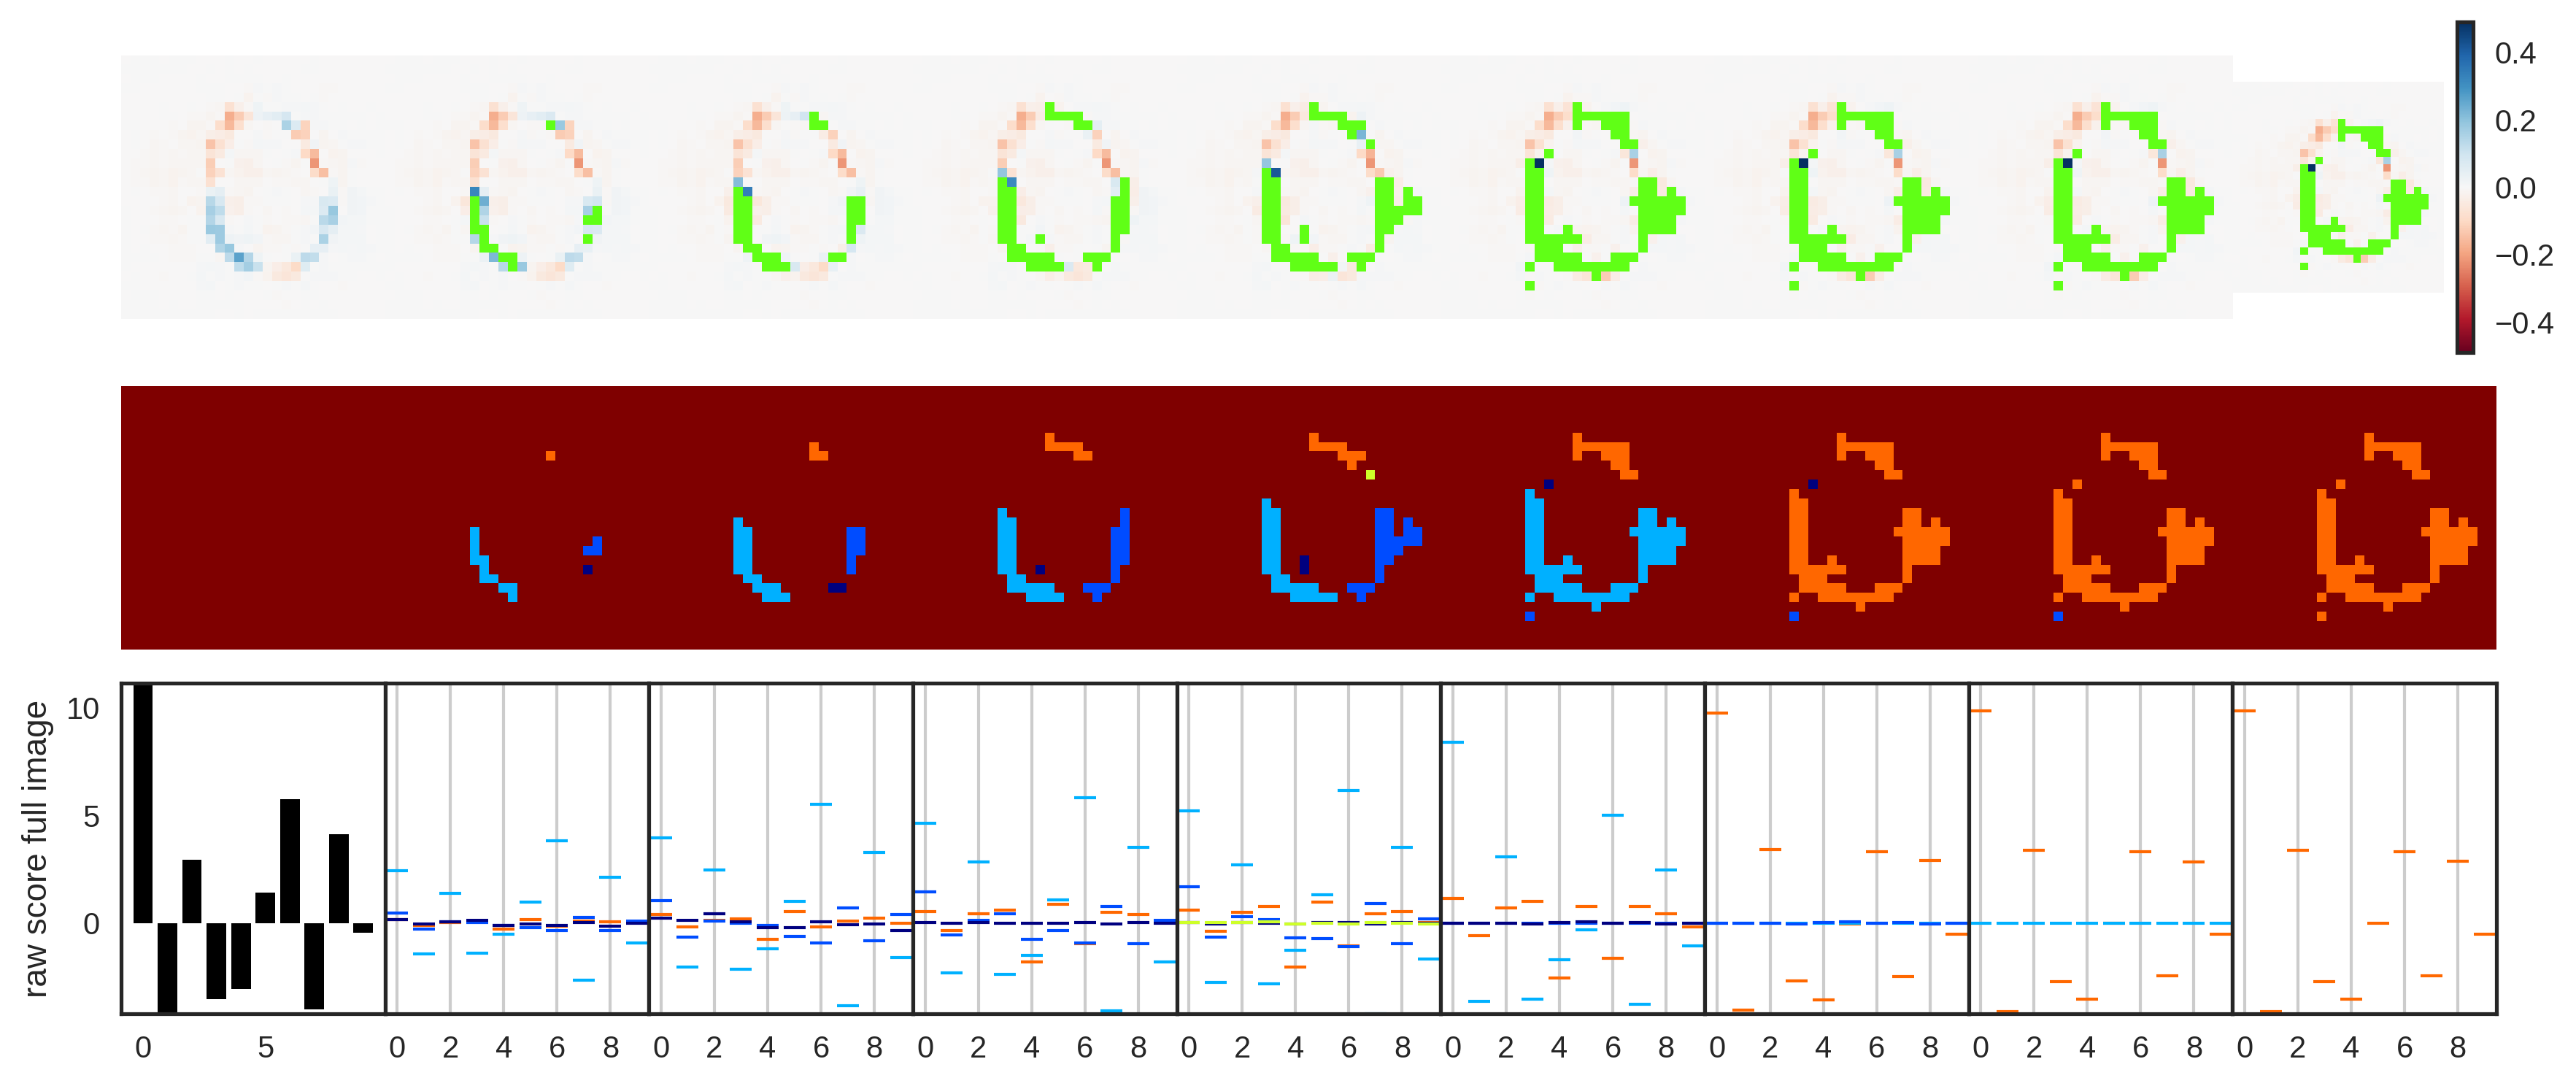

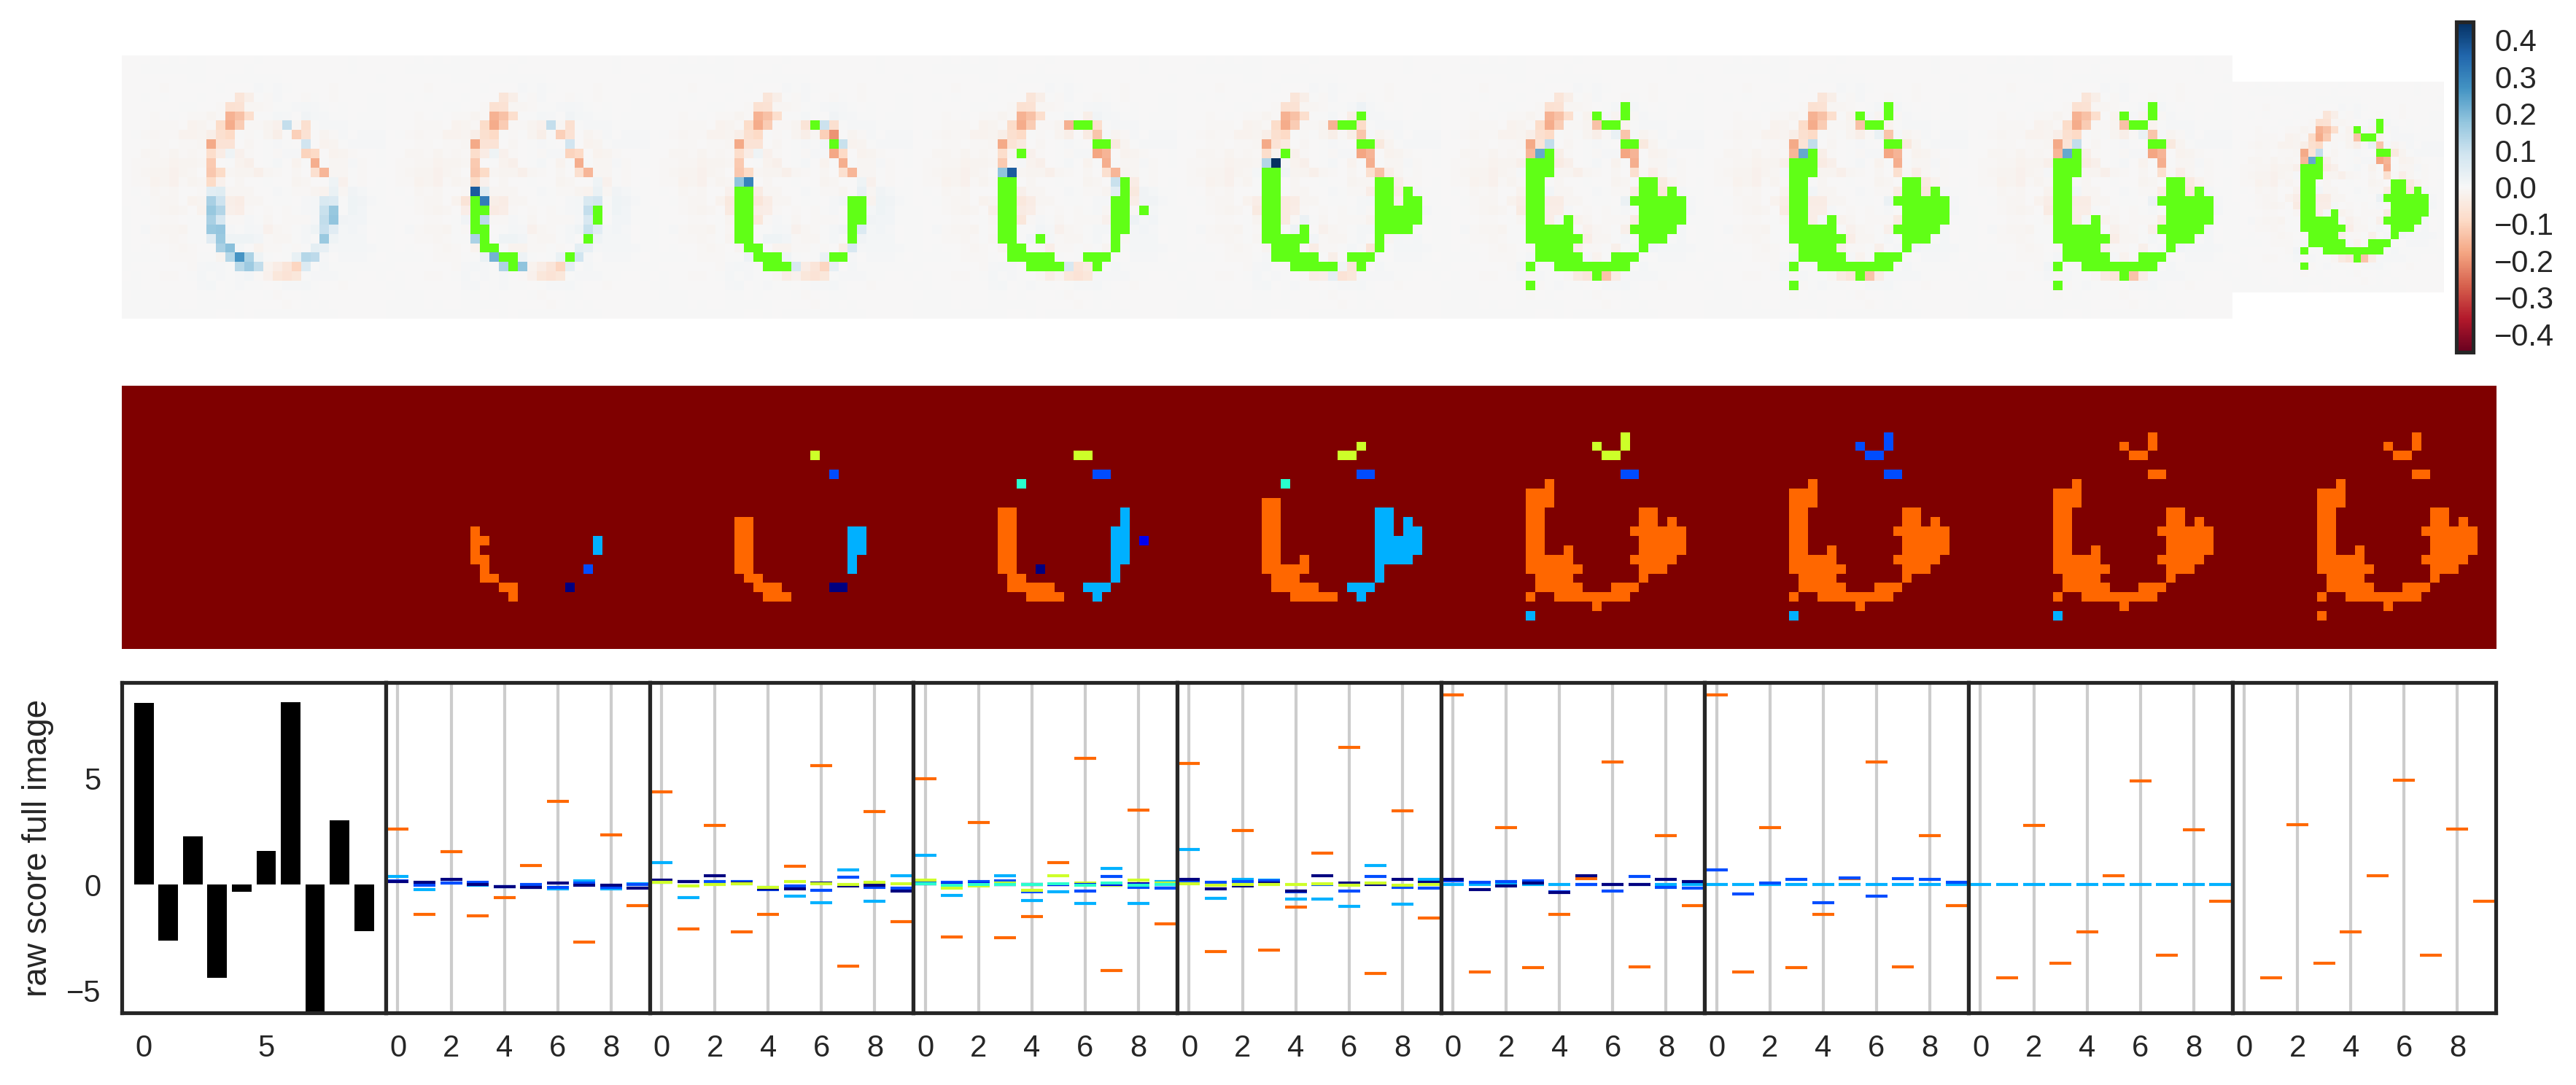

100%|██████████| 1/1 [00:16<00:00, 16.29s/it]


In [35]:
# pick im + attack
np.random.seed(1234)
im_nums = [np.random.permutation(10000)[26]]
#im_nums = range(3362, 3363)
for i in range(1):
    #im_nums = [np.random.permutation(10000)[i]]
    ats = ['saliency'] #['fgsm'] # ['fgsm', 'saliency', 'gradientattack', 'deepfoolattack', 'boundaryattack']
    for attack_type in ats:
        total_lists = []
        for im_num in tqdm(im_nums):
            print(im_num)
            # generate attack
            #im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(im_num, attack_type)
            print(pred_orig)
            print(pred_adv)

             # agg params
            method = 'cd'
            percentile_include = 98 # 98
            sweep_dim = 1
            layer = 'softmax'
            use_abs = False
            num_iters = 5

            # agglomerate lists
            if False:
                lists_orig_lab = attack_helper.agg_and_plot(im_torch, label, im_orig, model, dset.pred_ims, percentile_include, 
                     method, sweep_dim, layer, use_abs, num_iters=num_iters, plot=True)
                lists_orig_lab = attack_helper.agg_and_plot(im_torch_adv, label, im_orig_adv, model, dset.pred_ims, percentile_include, 
                     method, sweep_dim, layer, use_abs, num_iters=num_iters, plot=True)        
                lists_orig_lab = attack_helper.agg_and_plot(im_torch, target, im_orig, model, dset.pred_ims, percentile_include, 
                     method, sweep_dim, layer, use_abs, num_iters=num_iters, plot=True)
                lists_orig_lab = attack_helper.agg_and_plot(im_torch_adv, target, im_orig_adv, model, dset.pred_ims, percentile_include, 
                     method, sweep_dim, layer, use_abs, num_iters=num_iters, plot=True)
            
            lists = agglomerate.agglomerate(model, dset.pred_ims, percentile_include, 
                            'cd', sweep_dim, layer, im_orig, 
                            model.predict(im_torch), use_abs, num_iters=num_iters, 
                            im_torch=im_torch, model_type='mnist')
        
            # visualize
            rows=3
            plt.figure(figsize=(14, 6), facecolor='white', dpi=300)
            viz.visualize_ims_list(lists['scores_list'], 
                                   cmap_new='redwhiteblue',
                                   title='Refined scores',
                                   subplot_row=0, subplot_rows=rows, colorbar=True)
            viz.visualize_ims_list(lists['comps_list'],
                                  title='blobs',
                                  subplot_row=1, subplot_rows=rows, colorbar=False)
            viz.visualize_dict_list(lists['comp_scores_raw_list'], method,
                                   subplot_row=2, subplot_rows=rows)
            plt.show()
            
            lists = agglomerate.agglomerate(model, dset.pred_ims, percentile_include, 
                            'cd', sweep_dim, layer, im_orig_adv, 
                            model.predict(im_torch), use_abs, num_iters=num_iters, 
                            im_torch=im_torch_adv, model_type='mnist')
        
            # visualize
            rows=3
            plt.figure(figsize=(14, 6), facecolor='white', dpi=300)
            viz.visualize_ims_list(lists['scores_list'], 
                                   cmap_new='redwhiteblue',
                                   title='Refined scores',
                                   subplot_row=0, subplot_rows=rows, colorbar=True)
            viz.visualize_ims_list(lists['comps_list'],
                                  title='blobs',
                                  subplot_row=1, subplot_rows=rows, colorbar=False)
            viz.visualize_dict_list(lists['comp_scores_raw_list'], method,
                                   subplot_row=2, subplot_rows=rows)
            plt.show()



In [271]:
adv_scores = np.isnan(lists_adv_lab['scores_list'][i])
orig_scores = np.isnan(lists_orig_lab['scores_list'][min_gap])
                
#lab_overlap[i] = np.sum(np.logical_and(adv_scores, orig_scores)) / np.sum(np.logical_or(adv_scores, orig_scores))
l = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))
print(adv_scores.shape)
adv_scores = adv_scores[perturb == 0]
orig_scores = orig_scores[perturb == 0]
ll = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))


(28, 28)


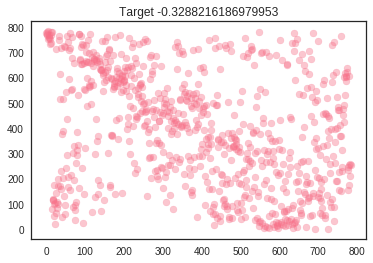

25
1
27
26
26


In [443]:
#small_inds = orig_targ_rankings < 200, orig_lab_rankings < 
plt.scatter(orig_targ_rankings, orig_lab_rankings, alpha=0.4)
plt.title('Target ' + str(np.corrcoef(orig_targ_rankings, orig_lab_rankings)[1,0]))
plt.show()
np.corrcoef(orig_targ_rankings, adv_targ_rankings)
scipy.stats.linregress(orig_targ_rankings, adv_targ_rankings)
print(len(targ_corrs))
print(len(lists_orig_lab['scores_list']))
print(len(lists_orig_targ['scores_list']))
print(len(lists_adv_lab['scores_list']))
print(len(lists_adv_targ['scores_list']))

# agg

In [36]:
attack_type = 'saliency' # ['fgsm', 'saliency', 'gradientattack', 'deepfoolattack', 'boundaryattack']
out_folder = 'adv_results' # 'adv_results/round2_total_lists'
method = 'cd'
if method == 'cd':
    total_lists = pickle.load(open(oj(out_folder, 'total_lists_' + attack_type + '.pkl'), 'rb'))
else:
    total_lists = pickle.load(open(oj(out_folder, 'total_lists_' + attack_type + '_' + method + '.pkl'), 'rb'))

plot_sub = True
sns.set_palette("husl", 12)
# cs = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
#plt.figure(figsize=(9, 3), dpi=250)
lab_corrs = []
targ_corrs = []
ind_to_j = {}
all_break = False
for j in range(100):
    if all_break:
        break

    for ex_num, all_lists in enumerate(total_lists):
        ([lists_orig_lab, lists_orig_targ, lists_adv_lab, lists_adv_targ], label, target, pred_orig, pred_adv, im_torch_adv, im_torch) = all_lists

        # check that attack is succesful
        if ex_num == j and pred_adv[target] > pred_adv[label] and pred_orig[label] > 0.95 and len(lists_orig_lab['scores_list']) > 1: #pred_orig[target]:
            print(pred_adv[target], pred_adv[label])
            # orig
            npix_orig_lab = np.array([np.sum(np.isnan(x)) for x in lists_orig_lab['scores_list']][1:])
            tots_orig_lab = np.array([x[label] for x in lists_orig_lab['comp_scores_raw_combined_list']])
            #tots_orig_lab = np.array([np.sum(np.isnan(x[label] * ) for x in lists_orig_lab['scores_list']])

        #     npix_orig_lab = np.insert(npix_orig_lab, 0, 0)
        #     tots_orig_lab = np.insert(tots_orig_lab, 0, 0)

            npix_orig_targ = np.array([np.sum(np.isnan(x)) for x in lists_orig_targ['scores_list']][1:])
            tots_orig_targ = np.array([x[target] for x in lists_orig_targ['comp_scores_raw_combined_list']])
        #     npix_orig_targ = np.insert(npix_orig_targ, 0, 0)
        #     tots_orig_targ = np.insert(tots_orig_targ, 0, 0)

        #     print(len(npix_orig_lab))
            # adv
            npix_adv_lab = np.array([np.sum(np.isnan(x)) for x in lists_adv_lab['scores_list']][1:])
            tots_adv_lab = np.array([x[label] for x in lists_adv_lab['comp_scores_raw_combined_list']])

            npix_adv_targ = np.array([np.sum(np.isnan(x)) for x in lists_adv_targ['scores_list']][1:])
            tots_adv_targ = np.array([x[target] for x in lists_adv_targ['comp_scores_raw_combined_list']])

            # Compute overlap between adversarial blob 
            perturb = (im_torch_adv - im_torch).data.cpu().numpy()[0, 0]

            lab_overlap = np.zeros(len(lists_adv_lab['scores_list']) - 1)
            lab_overlap_np = np.zeros(len(lists_adv_lab['scores_list']) - 1)
            for i, x in enumerate(lists_adv_lab['scores_list'][1:]):
                min_gap = np.argmin(np.abs(npix_orig_lab - npix_adv_lab[i]))
                adv_scores = np.isnan(lists_adv_lab['scores_list'][i])
                orig_scores = np.isnan(lists_orig_lab['scores_list'][min_gap])
                
                #lab_overlap[i] = np.sum(np.logical_and(adv_scores, orig_scores)) / np.sum(np.logical_or(adv_scores, orig_scores))
                lab_overlap[i] = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))
                adv_scores = adv_scores[perturb == 0]
                orig_scores = orig_scores[perturb == 0]
                lab_overlap_np[i] = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))

            targ_overlap = np.zeros(len(lists_adv_targ['scores_list']) - 1)
            targ_overlap_np = np.zeros(len(lists_adv_targ['scores_list']) - 1)
            for i, x in enumerate(lists_adv_targ['scores_list'][1:]):
                min_gap = np.argmin(np.abs(npix_orig_targ - npix_adv_targ[i]))
                adv_scores = np.isnan(lists_adv_targ['scores_list'][i])
                orig_scores = np.isnan(lists_orig_targ['scores_list'][min_gap])
                
                #targ_overlap[i] = np.sum(np.logical_and(adv_scores, orig_scores)) / np.sum(np.logical_or(adv_scores, orig_scores))
                targ_overlap[i] = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))
                adv_scores = adv_scores[perturb == 0]
                orig_scores = orig_scores[perturb == 0]
                targ_overlap_np[i] = 2 * np.sum(np.logical_and(adv_scores, orig_scores)) / (np.sum(adv_scores) + np.sum(orig_scores))
                
                
            # Compute ranking of pixels
            adv_lab_rankings = np.zeros(28 * 28)
            
            def compute_rankings(lists):
                rankings = np.zeros(28 * 28)
                scores_list = [x.flatten() for x in lists['scores_list']]
                base = 0

                for i in range(len(scores_list) - 1):
                    new_inds = np.where(np.logical_and(np.isnan(scores_list[i + 1]), ~np.isnan(scores_list[i])))[0]
                    new_scores = scores_list[i][new_inds]
                    rankings[new_inds] = np.argsort(new_scores)[::-1] + base
                    base += len(new_inds)
                if base < rankings.shape[0]:
                    leftover_inds = np.where(~np.isnan(scores_list[-1]))
                    leftover_scores = scores_list[-1][leftover_inds]
                    rankings[leftover_inds] = np.argsort(leftover_scores)[::-1] + base
                    base += len(leftover_inds)
                if len(np.unique(rankings)) != 784:
                    print("ERROR", base)
                        
                return rankings
            
            adv_lab_rankings = compute_rankings(lists_adv_lab)
            orig_lab_rankings = compute_rankings(lists_orig_lab)
            adv_targ_rankings = compute_rankings(lists_adv_targ)
            orig_targ_rankings = compute_rankings(lists_orig_targ)
            
            #plt.scatter(orig_lab_rankings, adv_lab_rankings, alpha=0.5)
            #print(orig_lab_rankings)
            #print(adv)
            lab_corrs.append(np.corrcoef(orig_lab_rankings, adv_lab_rankings)[1,0])
            #plt.title('Label ' + str(lab_corrs[-1]))
            #plt.show()
            #plt.scatter(orig_targ_rankings, adv_targ_rankings, alpha=0.5)
            targ_corrs.append(np.corrcoef(orig_targ_rankings, adv_targ_rankings)[1,0])
            ind_to_j[len(targ_corrs) - 1] = im_torch
            if lab_corrs[-1] > 0.8 and label == 0:
                all_break = True
                tmp = j
                break
            #plt.title('Target ' + str(targ_corrs[-1]))
            #plt.show()

            if False:
                confusion_mat_lab = np.zeros((10, 10))
                adv_grouping = {}
                adv_scores_list = [np.isnan(x).flatten() for x in lists_adv_lab['scores_list']]
                for i in range(confusion_mat_lab.shape[0]):
                    adv_grouping[i] = set(np.where(np.logical_xor(adv_scores_list[i + 1], adv_scores_list[i]))[0].tolist())

                orig_grouping = {}
                orig_scores_list = [np.isnan(x).flatten() for x in lists_orig_lab['scores_list']]
                for i in range(confusion_mat_lab.shape[1]):
                    orig_grouping[i] = set(np.where(np.logical_xor(orig_scores_list[i + 1], orig_scores_list[i]))[0].tolist())

                for i in range(confusion_mat_lab.shape[0]):
                    for j in range(confusion_mat_lab.shape[1]):
                        confusion_mat_lab[i, j] = len(adv_grouping[i] & orig_grouping[j])

                #confusion_mat_lab = np.log(confusion_mat_lab + 10)
                confusion_mat_lab /= np.sum(confusion_mat_lab, axis=0)[None, :] 
                lab_ent = np.sum([scipy.stats.entropy(confusion_mat_lab[i]) for i in range(10)])
                print("Target entropy", lab_ent)
                #tconfusion_mat_lab *= (tots_orig_lab[:10] - np.append(0, tots_orig_lab[:9]))[None, :]


                #heatmap(confusion_mat_lab, range(confusion_mat_lab.shape[0]), range(confusion_mat_lab.shape[1]))

                fig, ax = plt.subplots()

                im, cbar = heatmap(confusion_mat_lab, [str(a) for a in range(confusion_mat_lab.shape[0])], 
                                   [str(a) for a in range(confusion_mat_lab.shape[1])], ax=ax,
                                   cmap="YlGn", cbarlabel="num occurences")
                #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

                fig.tight_layout()
                plt.title('Label')
                plt.show()

                #confusion_mat_targ = np.zeros((len(lists_adv_targ['scores_list'][1:]), len(lists_orig_targ['scores_list'][1:])))
                confusion_mat_targ = np.zeros((10, 10))
                adv_grouping = {}
                adv_scores_list = [np.isnan(x).flatten() for x in lists_adv_targ['scores_list']]
                for i in range(confusion_mat_targ.shape[0]):
                    adv_grouping[i] = set(np.where(np.logical_xor(adv_scores_list[i + 1], adv_scores_list[i]))[0].tolist())

                orig_grouping = {}
                orig_scores_list = [np.isnan(x).flatten() for x in lists_orig_targ['scores_list']]
                for i in range(confusion_mat_targ.shape[1]):
                    orig_grouping[i] = set(np.where(np.logical_xor(orig_scores_list[i + 1], orig_scores_list[i]))[0].tolist())

                for i in range(confusion_mat_targ.shape[0]):
                    for j in range(confusion_mat_targ.shape[1]):
                        confusion_mat_targ[i, j] = len(adv_grouping[i] & orig_grouping[j])

                #confusion_mat_lab = np.log(confusion_mat_lab + 10)
                confusion_mat_targ /= np.sum(confusion_mat_targ, axis=0)[None, :] 
                targ_ent = np.sum([scipy.stats.entropy(confusion_mat_targ[i]) for i in range(10)])
                print("Target entropy", targ_ent)
                #confusion_mat_targ *= (tots_orig_targ[:10] - np.append(0, tots_orig_targ[:9]))[None, :]

                #heatmap(confusion_mat_lab, range(confusion_mat_lab.shape[0]), range(confusion_mat_lab.shape[1]))

                fig, ax = plt.subplots()

                im, cbar = heatmap(confusion_mat_targ, [str(a) for a in range(confusion_mat_targ.shape[0])], 
                                   [str(a) for a in range(confusion_mat_targ.shape[1])], ax=ax,
                                   cmap="YlGn", cbarlabel="num occurences")
                #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

                fig.tight_layout()
                plt.title('Target')
                plt.show()
                #print(confusion_mat_lab)
                #print(np.sum(confusion_mat_lab, 0))

                plt.subplot(121)
                if plot_sub:
                    #plt.plot(npix_orig_lab/7.84, tots_orig_lab - tots_orig_targ, '-o', markersize=2, alpha = 0.35, label=ex_num) #color=cs[ex_num])
                    #plt.plot(npix_adv_lab/7.84, tots_adv_lab, '-o', markersize=2, alpha = 0.35, label=str(ex_num) + '-adv') #color=cs[ex_num])
                    #plt.plot(npix_orig_lab/7.84, tots_orig_lab, '-o', markersize=2, alpha = 0.35, label=str(ex_num) + '-orig') #color=cs[ex_num])
                    plt.plot(npix_adv_lab/7.84, lab_overlap)
                    plt.plot(npix_adv_lab/7.84, lab_overlap_np, label='no-perturb')
                else:
                    plt.plot(npix_orig_lab/7.84, tots_orig_lab, ':', alpha = 0.35, label=ex_num) #color=cs[ex_num])
                    plt.plot(npix_orig_lab/7.84, tots_orig_targ, '--', alpha = 0.35, label=ex_num) #color=cs[ex_num])
                plt.ylabel('Difference in total CD score\n(original class - adversarial class)')
                plt.xlabel('Percent of pixels selected (%)')
                #plt.title('Original image')
                plt.title("Label")
                plt.legend()

                plt.subplot(122)
                if plot_sub:
                    #plt.plot(npix_adv_lab/7.84, tots_adv_lab - tots_adv_targ, '-o', markersize=2, alpha = 0.35, label=ex_num) #color=cs[ex_num])
                    #plt.plot(npix_adv_targ/7.84, tots_adv_targ, '-o', markersize=2, alpha = 0.35, label=str(ex_num) + '-adv') #color=cs[ex_num])
                    #plt.plot(npix_orig_targ/7.84, tots_orig_targ, '-o', markersize=2, alpha = 0.35, label=str(ex_num) + '-orig') #color=cs[ex_num])
                    plt.plot(npix_adv_targ/7.84, targ_overlap)
                    plt.plot(npix_adv_targ/7.84, targ_overlap_np, label='no-perturb')
                else:
                    plt.plot(npix_adv_lab/7.84, tots_adv_lab, ':', alpha = 0.35, label=ex_num) #color=cs[ex_num])
                    plt.plot(npix_adv_lab/7.84, tots_adv_targ, '--', alpha = 0.35, label=ex_num) #color=cs[ex_num])

            #     plt.ylabel('Total CD score\nlabel - target adversarial image')
                plt.xlabel('Percent of pixels selected (%)')        
                #plt.title('Adversarial Image')
                plt.title("Target")
                plt.legend()
                plt.show()

    bot = -1
    top = 1 #np.max(tots_orig_lab)
    plt.subplot(121)
    plt.xlim((0, 101))
    plt.ylim((bot, top))
    plt.plot([0, 100], [0, 0], '--', color='gray', alpha=0.4)

    plt.subplot(122)
    plt.xlim((0, 101))
    plt.ylim((bot, top))
    #plt.gca().yaxis.set_visible(False)
    plt.plot([0, 100], [0, 0], '--', color='gray', alpha=0.4)
    plt.subplots_adjust(wspace=0.1)
    plt.show()

lab_corrs.extend(targ_corrs)
print(np.mean(lab_corrs))
#print(np.mean(targ_corrs))

adv_results/total_lists_saliency.pkl


NameError: name 'asd' is not defined

In [21]:
np.argsort(targ_corrs)
print(lab_corrs[-1])
print(len(lab_corrs))
print(label)
print(tmp)
print(ex_num)
print(j)

0.91683796734156
50
0
26
26
27


In [464]:
np.argsort(targ_corrs)
targ_corrs[24]
print(len(targ_corrs))
print(tmp)
ind_to_j

45
25


{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 22,
 21: 23,
 22: 24,
 23: 25,
 24: 26,
 25: 27,
 26: 28,
 27: 29,
 28: 30,
 29: 31,
 30: 32,
 31: 33,
 32: 34,
 33: 35,
 34: 36,
 35: 38,
 36: 39,
 37: 40,
 38: 41,
 39: 42,
 40: 43,
 41: 44,
 42: 45,
 43: 48,
 44: 49}

In [292]:
([lists_orig_lab, lists_orig_targ, lists_adv_lab, lists_adv_targ], 
 label, target, pred_orig, pred_adv, im_torch_adv, im_torch) = total_lists[9]
tots_adv_lab


perturb = (im_torch_adv - im_torch).data.cpu().numpy()[0,0]
#plt.hist(perturb.flatten())
print('Non-zero perturbs', np.sum(perturb != 0))
np.array([np.sum(~np.isnan(x)) for x in lists_orig_lab['scores_list']][1:])
prod = np.ones_like(scores_list[0])
print(np.array([np.sum(np.isnan(x)) for x in scores_list][1:]))
print('Number of iters', len(np.array([np.sum(np.isnan(x)) for x in scores_list][1:])))

for vals in [lists_orig_lab, lists_orig_targ, lists_adv_lab, lists_adv_targ]:
    scores_list = vals['scores_list']
    #scores_list = lists_orig_lab['scores_list']

    perturb[np.isnan(scores_list[1])]

    print(np.array([np.sum((perturb != 0) * np.isnan(x)) for x in scores_list][1:]))
    #print(np.min(np.where(np.array([np.sum((perturb != 0) * np.isnan(x)) >= np.sum(perturb != 0) - 1 for x in scores_list][1:]))))
    prod *= ~np.isnan(scores_list[27])
#print(np.sum(prod))
#print(np.sum(prod[perturb != 0]))


Non-zero perturbs 5
[ 16  32  48  67  89 109 130 148 163 177 192 209 226 247 269 393 488 566
 616 657 690 714 732 746 764 773 776 782]
Number of iters 28
[0 0 0 0 1 3 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]
[0 0 1 2 2 2 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5]


In [72]:
np.array([np.sum(np.isnan(x)) for x in lists_orig_lab['scores_list']][1:])
np.array([x[label] for x in lists_adv_lab['comp_scores_raw_combined_list']])
print(lists_adv_lab['comp_scores_raw_combined_list'][-1])
np.array([np.sum(~np.isnan(x)) for x in lists_adv_lab['scores_list']][1:])

[-0.5622394  -2.1752927  -2.63397     6.5285525  -3.9883757   5.2601004
 -1.583102   -2.871023    0.31432515  0.71895653]


array([768, 751, 734, 714, 693, 674, 654, 635, 617, 597, 581, 566, 548,
       526, 506, 405, 311, 238, 175, 132, 103,  81,  60,  44,  31,  19,
        13,   3])

In [ ]:
total_lists = pickle.load(open('adv_results/total_lists_' + attack_type + '.pkl', 'rb'))
([lists_orig_lab, lists_orig_targ, lists_adv_lab, lists_adv_targ], label, target) = total_lists[0]
    
x = lists_orig_lab['im_thresh_list']
print(len(x))
[np.sum(a) for a in x]

# full agg plots

In [ ]:
attack_helper.plot_attack(im_orig, im_orig_adv, label, target, pred_orig, pred_adv)

In [ ]:
plot_lists(lists_orig_lab)
plt.show()
# plot_lists(lists_orig_targ)
# plt.show()
# plot_lists(lists_adv_lab)
# plt.show()
# plot_lists(lists_adv_targ)
# plt.show()

# plot all attacks

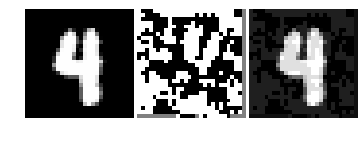

	label: 4 0.99438715 -> 0.4802195
	target: 9 0.005561781 -> 0.51882577


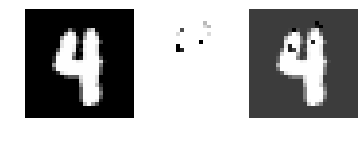

	label: 4 0.99438715 -> 0.48302823
	target: 9 0.005561781 -> 0.5153266


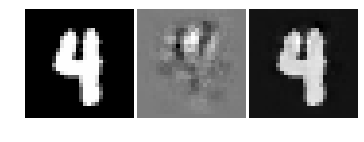

	label: 4 0.99438715 -> 0.4722832
	target: 9 0.005561781 -> 0.52660275


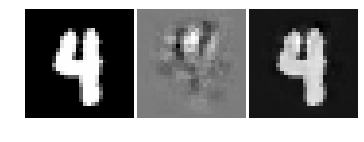

	label: 4 0.99438715 -> 0.26237604
	target: 9 0.005561781 -> 0.73643243
run with verbose=True to see details
Step 0: 6.65655e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3320: 3.27221e-04, stepsizes = 5.1e-05/7.8e-08: 
Step 3428: 3.27221e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3429: 3.27221e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3430: 3.27221e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3431: 3.27221e-04, stepsizes = 1.8e-07/5.2e-08: 
Step 3432: 3.27221e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3433: 3.27221e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3434: 3.27221e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3435: 3.27221e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3436: 3.27221e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3437: 3.27221e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3438: 3.27221e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3439: 3.27221e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3440: 3.27221e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3441: 3.27221e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3442: 3.27221e-04, stepsi

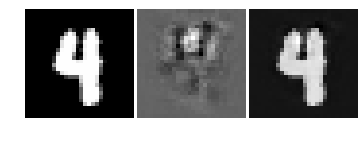

	label: 4 0.99438715 -> 0.49943218
	target: 9 0.005561781 -> 0.4994317


In [7]:
im_num = 250

# pick im + attack
ats = ['fgsm', 'saliency', 'gradientattack', 'deepfoolattack', 'boundaryattack']
vals = []
for attack_type in ats:
    # generate attack
    im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(im_num, attack_type)
    vals.append((im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv))
    attack_helper.plot_attack(im_orig, im_orig_adv, label, target, pred_orig, pred_adv)

	label: 4 0.99438715 -> 0.4802195
	target: 9 0.005561781 -> 0.51882577
	label: 4 0.99438715 -> 0.48302823
	target: 9 0.005561781 -> 0.5153266
	label: 4 0.99438715 -> 0.4722832
	target: 9 0.005561781 -> 0.52660275
	label: 4 0.99438715 -> 0.26237604
	target: 9 0.005561781 -> 0.73643243
	label: 4 0.99438715 -> 0.49943218
	target: 9 0.005561781 -> 0.4994317


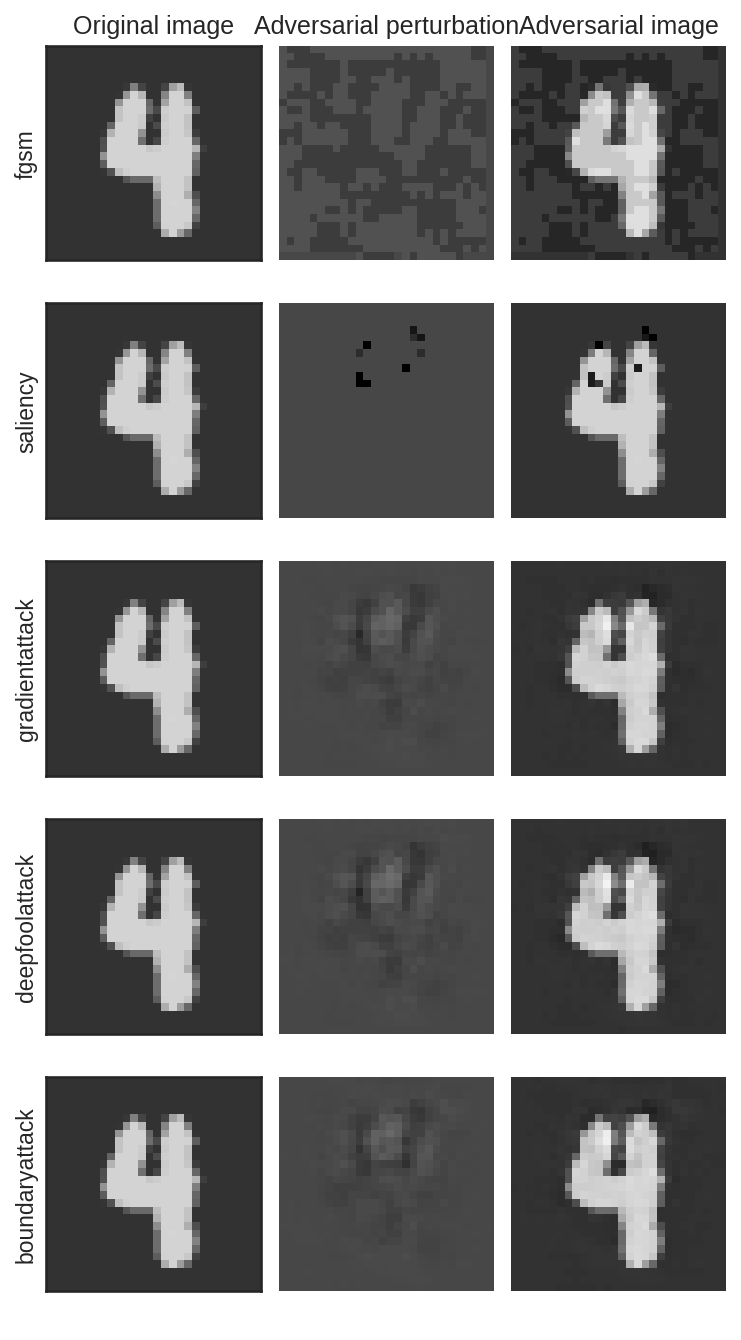

In [8]:
plt.figure(figsize=(6, 11), dpi=150)
num_rows = 5
num_cols = 3
vmin = 10
vmax = 0

# find min and max
for i, attack_type in enumerate(ats):
    (im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv) = vals[i]
    vmi = min([np.min(im) for im in [im_orig, im_orig_adv, im_orig - im_orig_adv]])
    vma = max([np.max(im) for im in [im_orig, im_orig_adv, im_orig - im_orig_adv]])
    vmin = min(vmi, vmin)
    vmax = max(vma, vmax)

for i, attack_type in enumerate(ats):
    (im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv) = vals[i]

#     attack_helper.plot_attack(im_orig, im_orig_adv, label, target, pred_orig, pred_adv)
    plt.subplot(num_rows, num_cols, num_cols * i + 1)

    plt.imshow(im_orig, cmap='gray', vmin=vmin, vmax=vmax)
    plt.gca().xaxis.set_visible(False) #('off')
    plt.gca().yaxis.set_ticks([]) #('off')
    if i == 0:
        plt.title('Original image')
    plt.ylabel(attack_type)

    plt.subplot(num_rows, num_cols, num_cols * i + 2)
    plt.imshow(im_orig_adv - im_orig, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    if i == 0:
        plt.title('Adversarial perturbation')
        
    plt.subplot(num_rows, num_cols, num_cols * i + 3)
    plt.imshow(im_orig_adv, cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    if i == 0:
        plt.title('Adversarial image')
    print('\tlabel:', label, pred_orig[label], '->', pred_adv[label])
    print('\ttarget:', target, pred_orig[target], '->', pred_adv[target])        
plt.subplots_adjust(wspace=0)
plt.show()



In [273]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts